# **Crime_Data**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving crime_data.csv to crime_data.csv


In [3]:
crime_data  = pd.read_csv("crime_data.csv")
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
crime_data.rename({'Unnamed: 0':'States'},axis=1,inplace=True)
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
crime_data.shape

(50, 5)

In [8]:
crime_data.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

Analyzing the features by creating histograms to understand the distribution

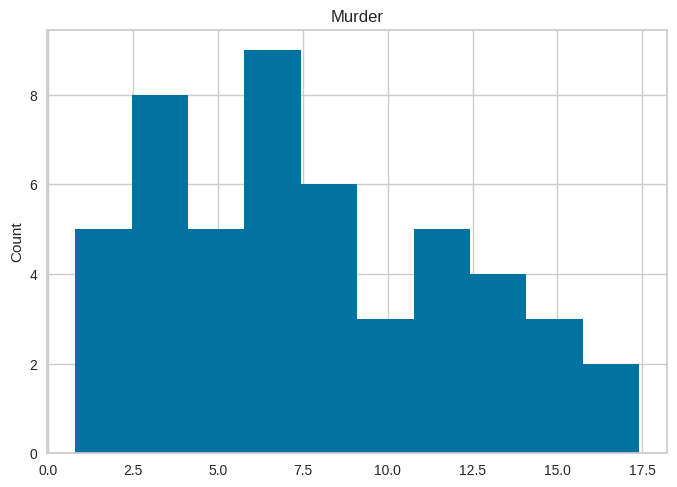

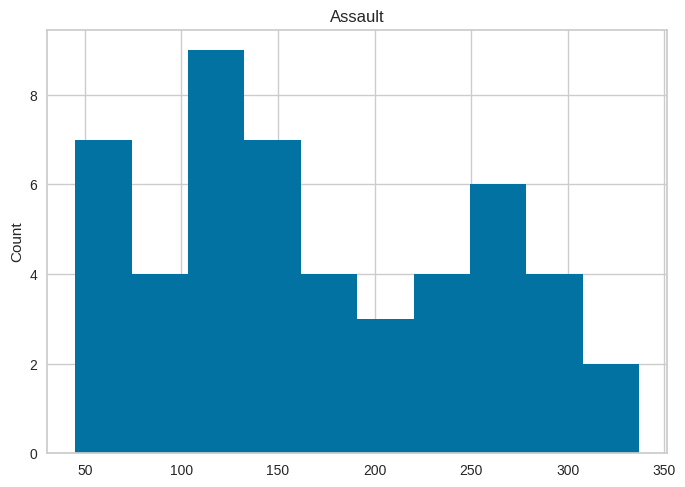

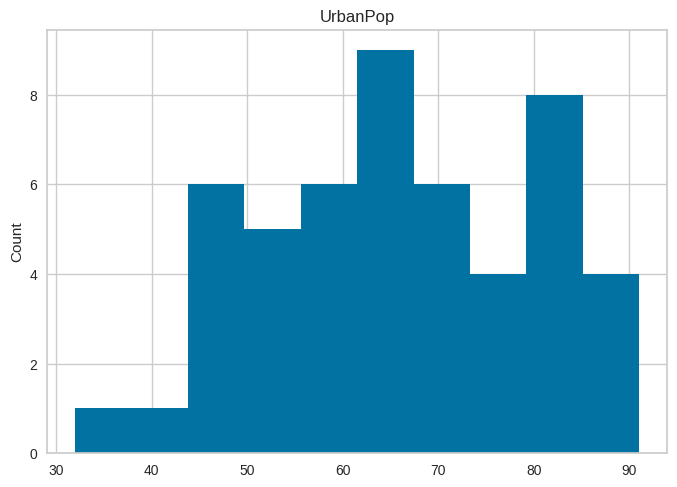

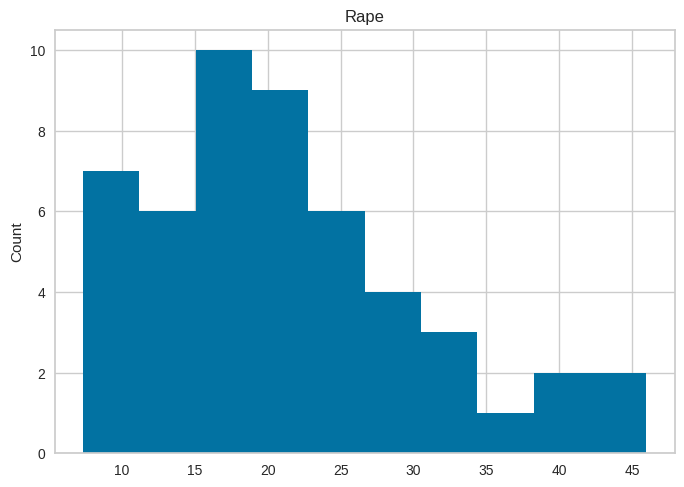

In [9]:
continuous_feature = [feature for feature in crime_data.columns if crime_data[feature].dtype!='O']
for feature in continuous_feature:
  crime_data1 = crime_data.copy()
  crime_data1[feature].hist(bins=10)
  plt.ylabel('Count')
  plt.title(feature)
  plt.show()


Murder


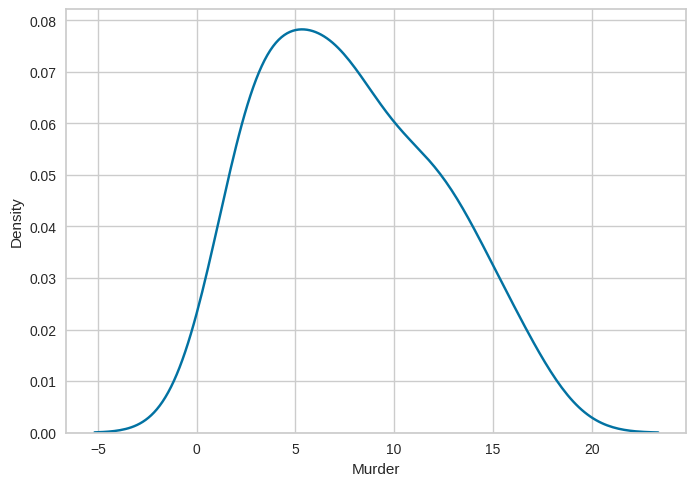

Assault


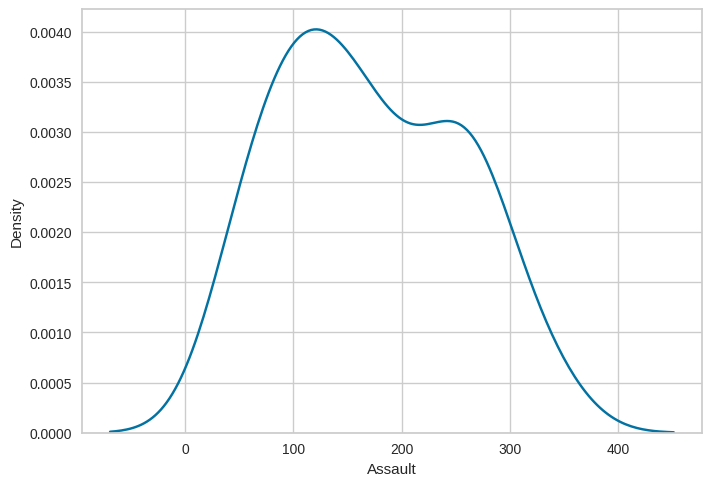

UrbanPop


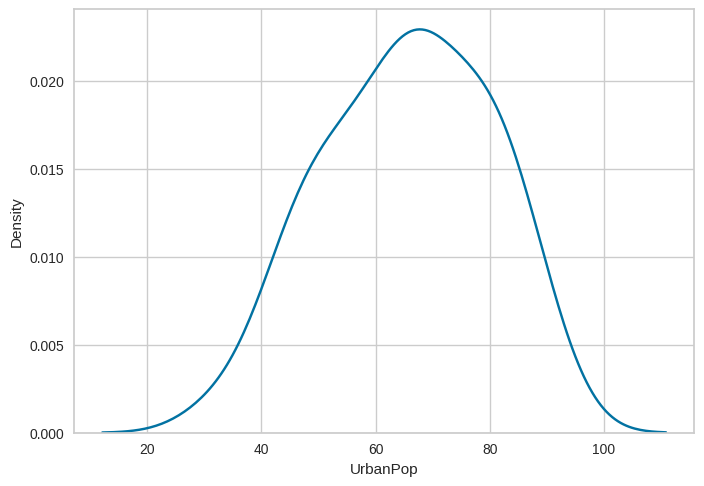

Rape


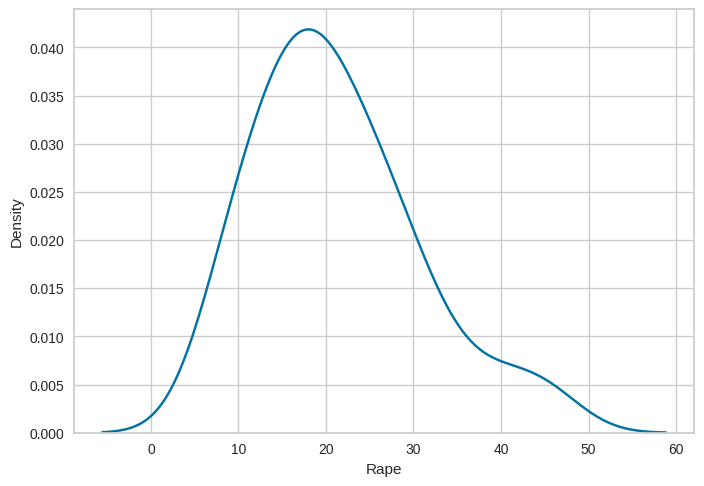

In [10]:
#Kernel Density for Each Feature, SIngle Out
for n in continuous_feature:
  print(n)
  sns.kdeplot(crime_data[n])
  plt.show()

In [11]:
crime_data.columns

Index(['States', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

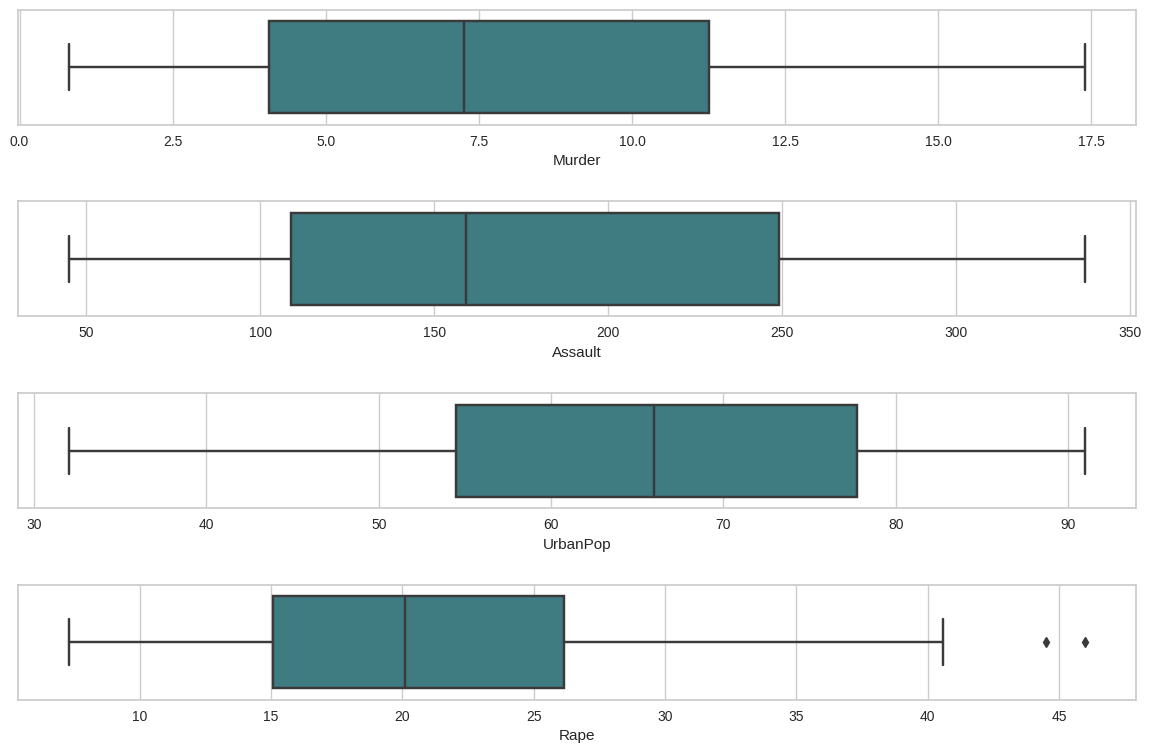

In [12]:
#Outliers_Detection
outlier = crime_data.copy()
fig, axes = plt.subplots(4,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Assault',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='UrbanPop',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='Rape',data=outlier,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

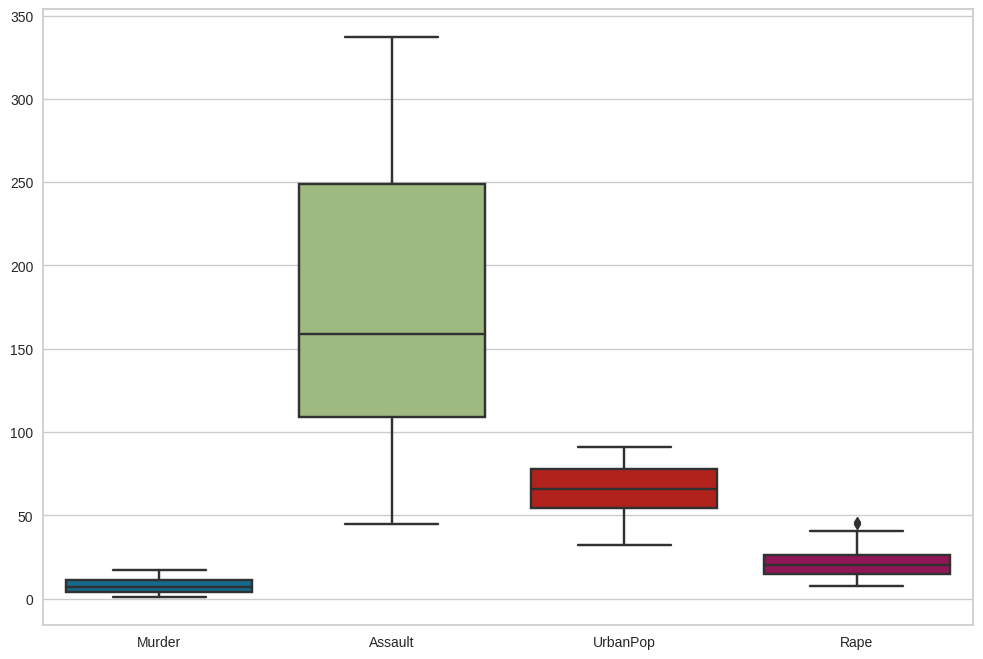

In [13]:
#Box-Plot for every Feature In same Graph
plt.figure(figsize=(12,8))
sns.boxplot(data=crime_data)
plt.show()

Correlation Heatmap

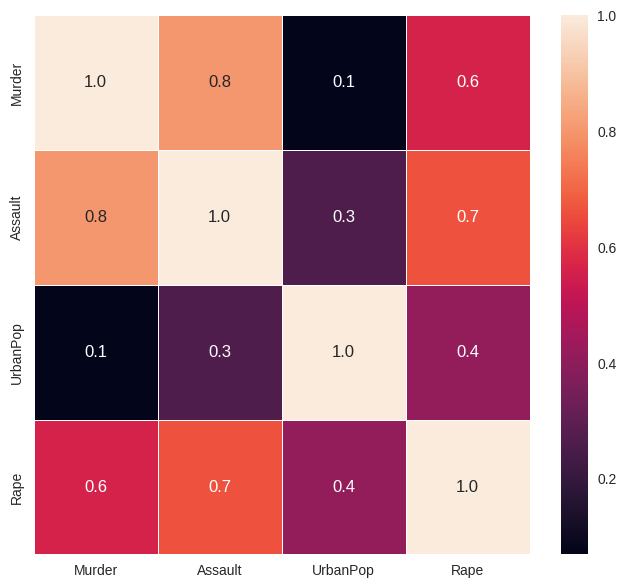

In [14]:
f,ax = plt.subplots(figsize=(8,7))
sns.heatmap(crime_data.corr(),annot=True, linewidths=0.5, fmt='.1f',ax=ax)
plt.show()

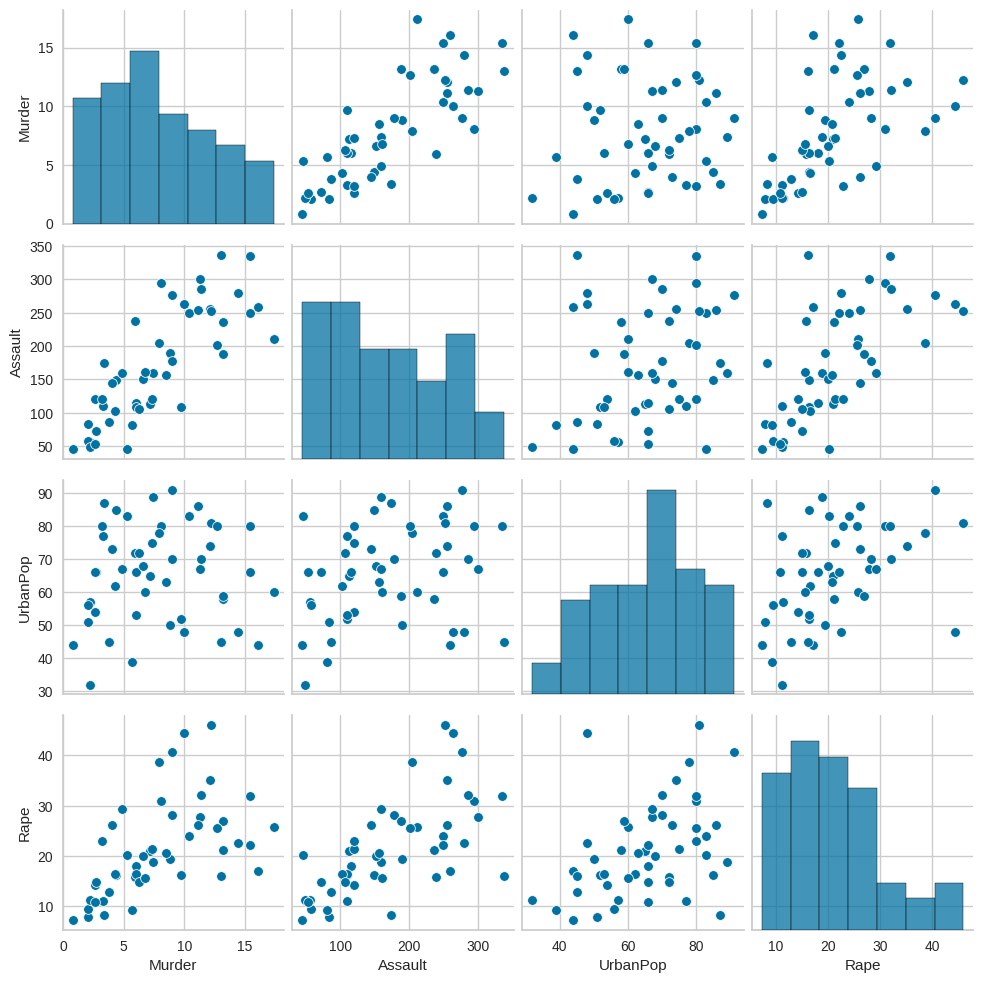

In [15]:
sns.pairplot(crime_data)
plt.show()

Unique Points In the Correlation Matrix:

Assault is positively correlated with Murder Assualt is positively correlated with Rape Rape is positively correlated with Murder

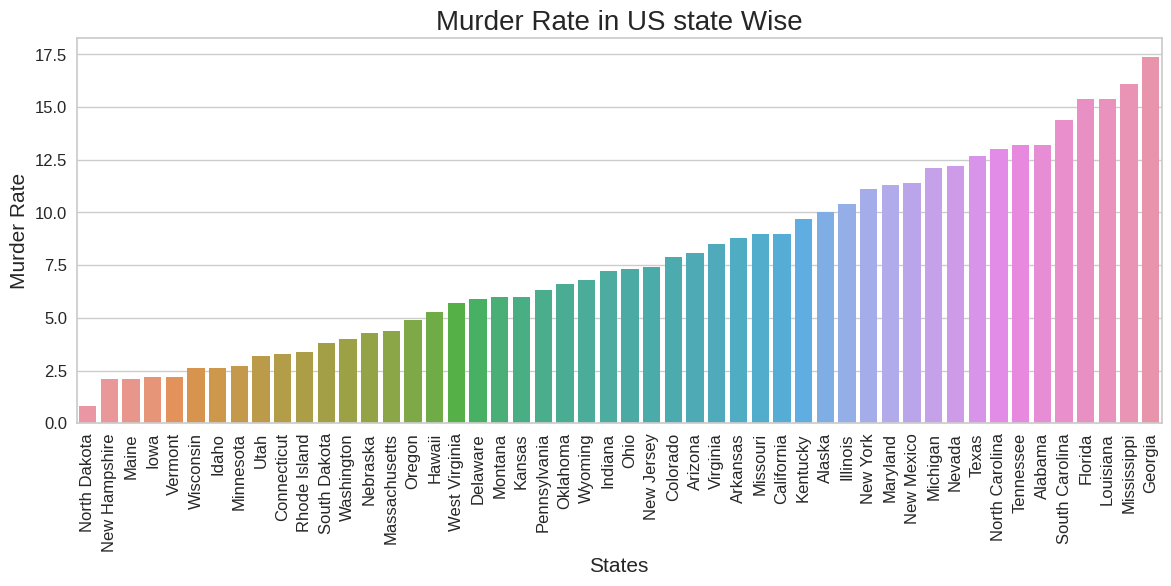

In [16]:
#Murder Rate
plt.figure(figsize=(14,5))

#Make barplot and Sortbars
sns.barplot(x='States',y="Murder",data=crime_data, order = crime_data.sort_values('Murder').States)

#set Labels
plt.xlabel('States',size=15)
plt.ylabel('Murder Rate',size=15)
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)
plt.title("Murder Rate in US state Wise",size=20)
plt.show()

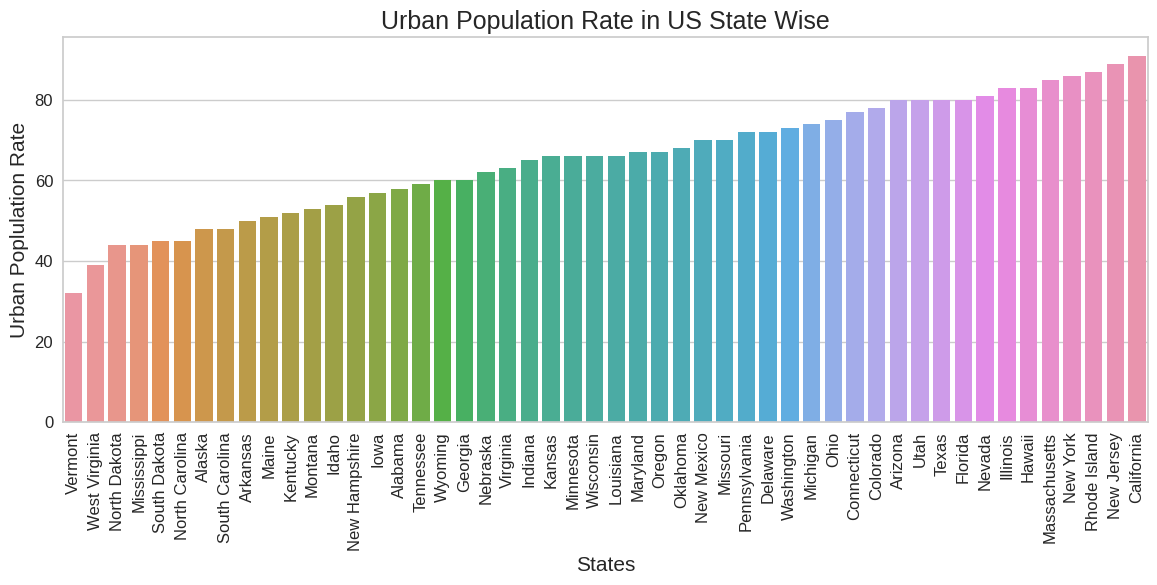

In [17]:
plt.figure(figsize=(14,5))

#Barplots and Sortbars
sns.barplot(x='States',y='UrbanPop', data=crime_data,order=crime_data.sort_values('UrbanPop').States)

#Set Labels
plt.xlabel("States",size=15)
plt.ylabel("Urban Poplulation Rate",size = 15)
plt.yticks(rotation = 0, fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)
plt.title("Urban Population Rate in US State Wise",size=18)
plt.show()

There is no direct relation between Murder Rate and Urban Population but you can see a less number of Murder rate can be seen North Dakota as it Urban population is less compare to Florida and has the opposite effect

In [18]:
high_murder = crime_data.sort_values('Murder',ascending =False, ignore_index=True)
high_murder.head()

,States,Murder,Assault,UrbanPop,Rape
0,Georgia,17.4,211,60,25.8
1,Mississippi,16.1,259,44,17.1
2,Florida,15.4,335,80,31.9
3,Louisiana,15.4,249,66,22.2
4,South Carolina,14.4,279,48,22.5


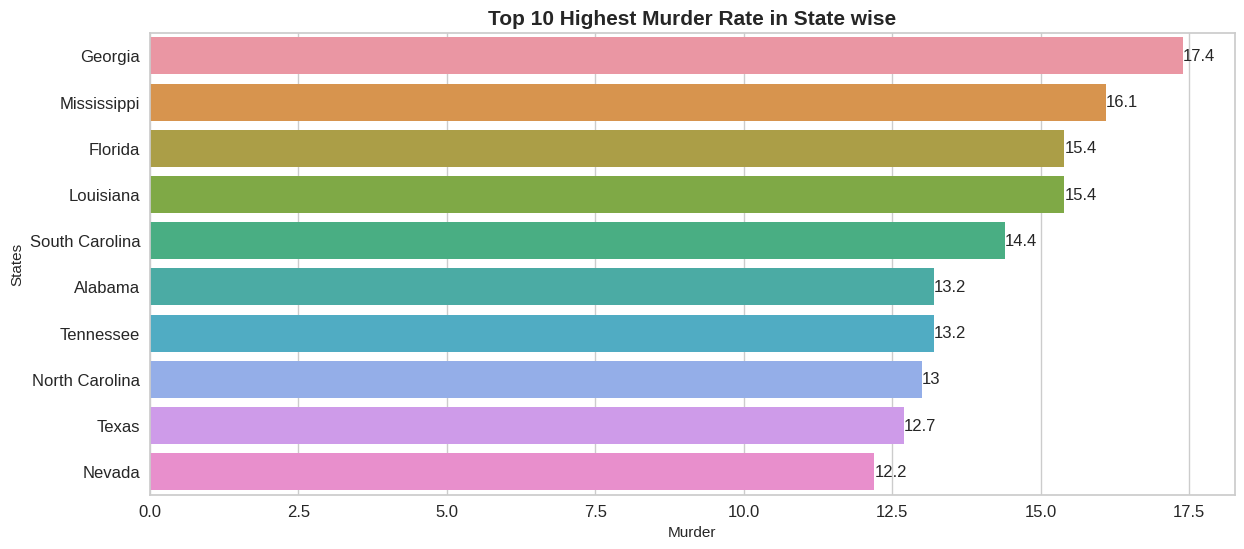

In [19]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x= high_murder.Murder[:10],y=high_murder.States[:10])
plt.yticks(rotation =0,fontsize=12)
plt.xticks(rotation = 0, fontsize = 12)
plt.title('Top 10 Highest Murder Rate in State wise',fontsize = 15, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

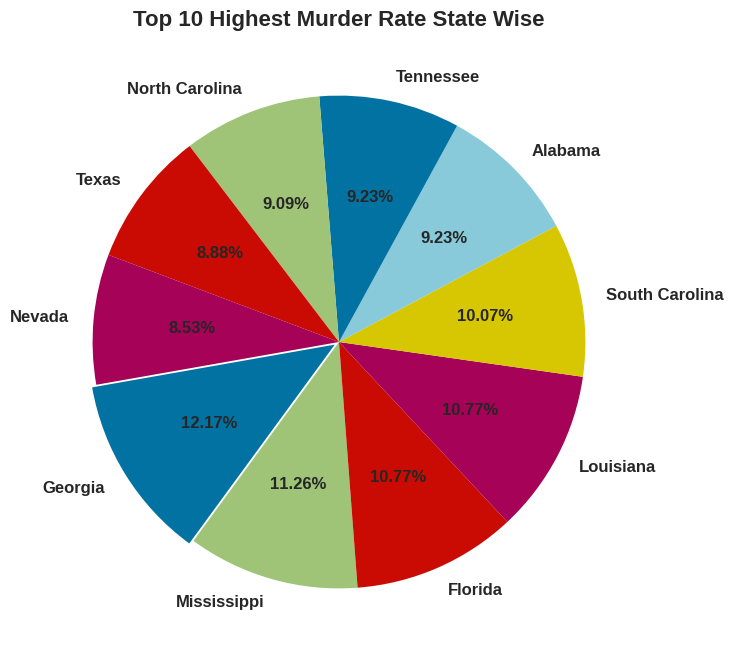

In [22]:
plt.figure(figsize=(8,8))
plt.pie(high_murder.Murder[:10],labels = high_murder.States[:10],
        explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
        autopct = '%.2f%%', startangle=190, textprops = {'size':'medium','fontweight':'bold'})
plt.title("Top 10 Highest Murder Rate State Wise",fontsize = 16 , fontweight='bold')
plt.show()

In [23]:
low_murder = crime_data.sort_values('Murder',ascending=True, ignore_index=True)
low_murder.head()

,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,New Hampshire,2.1,57,56,9.5
2,Maine,2.1,83,51,7.8
3,Iowa,2.2,56,57,11.3
4,Vermont,2.2,48,32,11.2


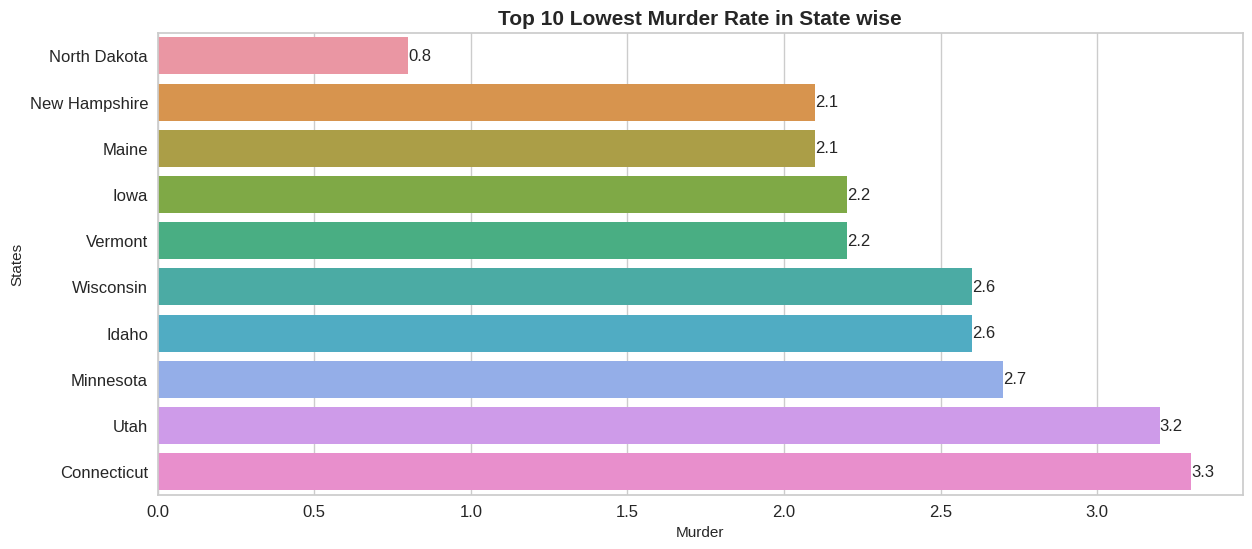

In [24]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x= low_murder.Murder[:10],y=low_murder.States[:10])
plt.yticks(rotation =0,fontsize=12)
plt.xticks(rotation = 0, fontsize = 12)
plt.title('Top 10 Lowest Murder Rate in State wise',fontsize = 15, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

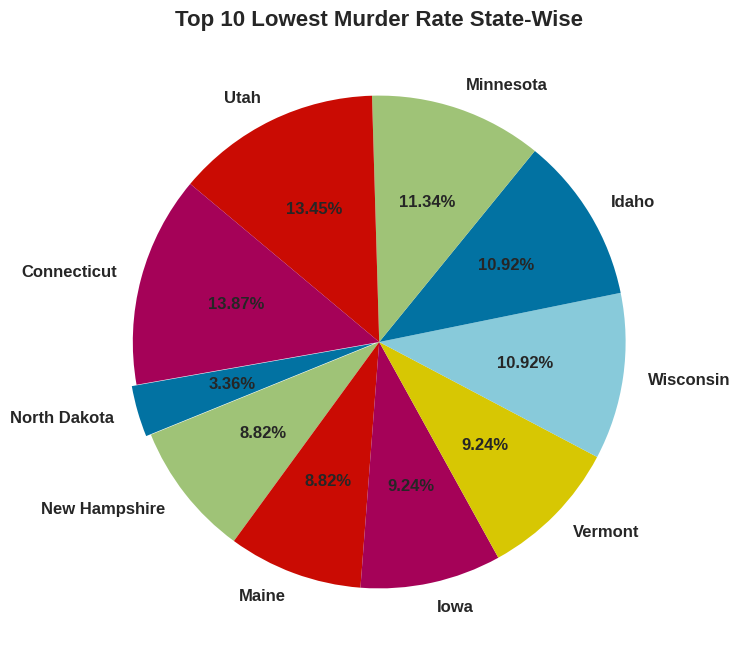

In [25]:
plt.figure(figsize = (8,8))
plt.pie(low_murder.Murder[:10], labels= low_murder.States[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold',})

plt.title("Top 10 Lowest Murder Rate State-Wise", fontsize = 16, fontweight = 'bold')
plt.show()

## **Observation**

Highest Murder Rate: Georgia, Missisippi, Florida

Lowest_Murder_Rate = North Dakota, New Hampshire, Maine, Lowa, Vermont,Wisconsin, Idaho

Assault Rate

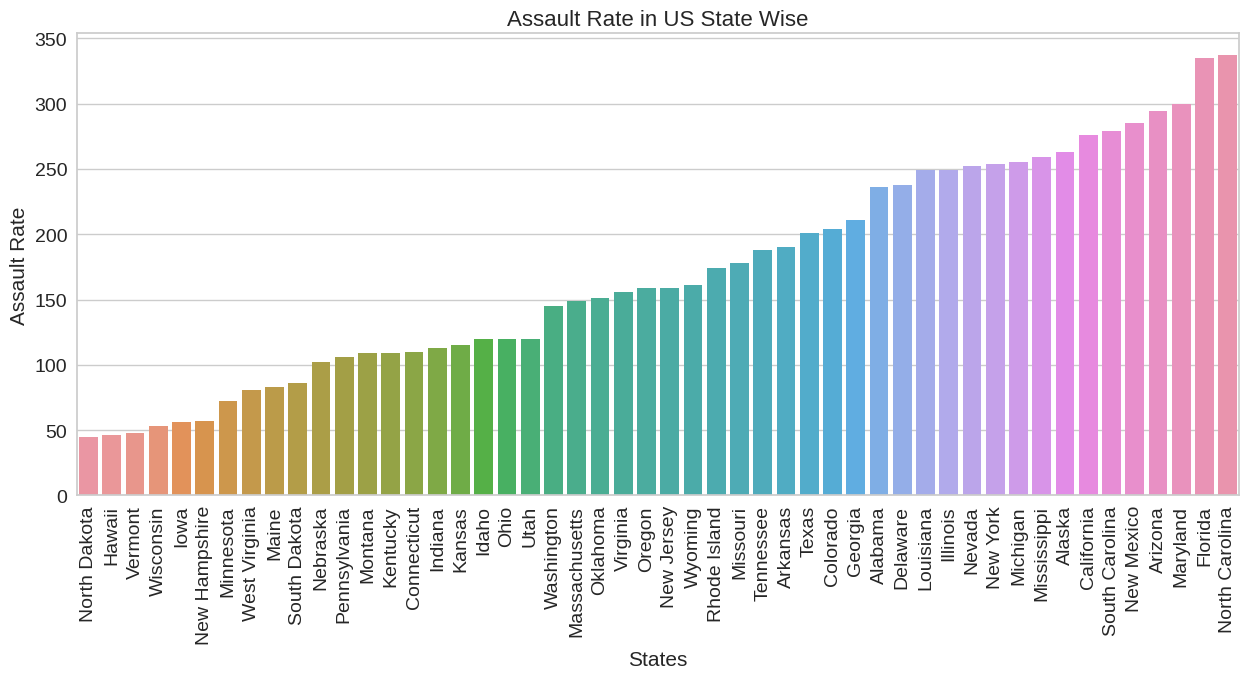

In [27]:
plt.figure(figsize=(15,6))
#Make Barplot and Sortbars
sns.barplot(x='States',y='Assault',data = crime_data, order = crime_data.sort_values('Assault').States)

#Set Labels
plt.xlabel('States',size= 15)
plt.ylabel("Assault Rate", size=15)
plt.yticks(rotation = 0,fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Assault Rate in US State Wise", size=16)
plt.show()

In [28]:
high_assault = crime_data.sort_values('Assault',ascending = False, ignore_index= True)
high_assault.head()

,States,Murder,Assault,UrbanPop,Rape
0,North Carolina,13.0,337,45,16.1
1,Florida,15.4,335,80,31.9
2,Maryland,11.3,300,67,27.8
3,Arizona,8.1,294,80,31.0
4,New Mexico,11.4,285,70,32.1


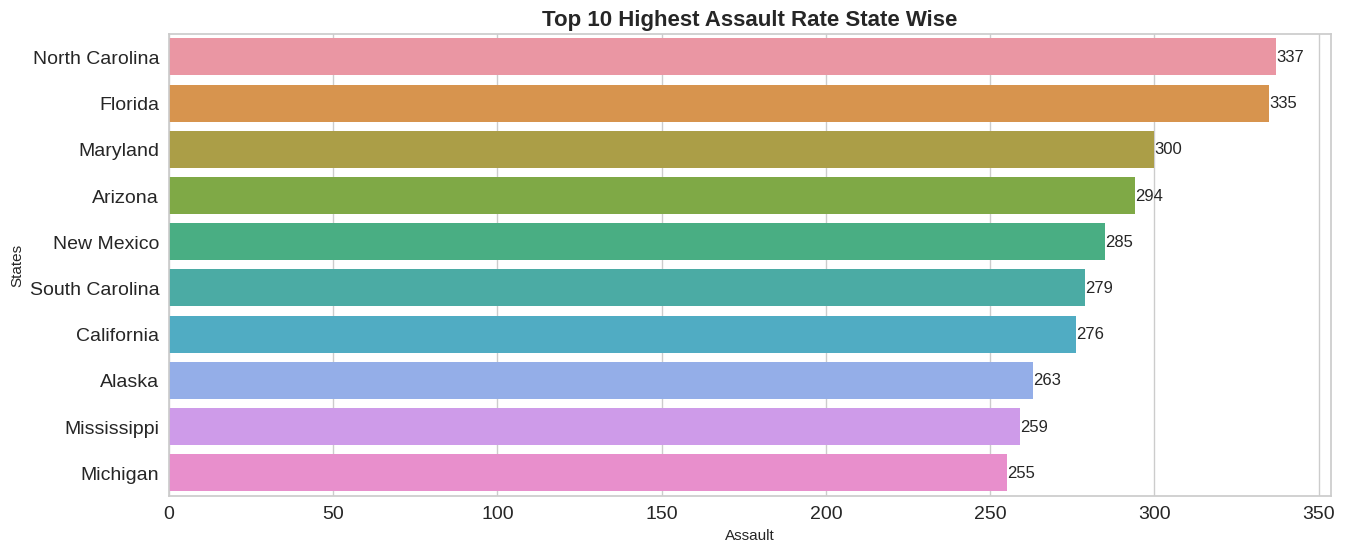

In [29]:
plt.figure(figsize=(15,6))
ax= sns.barplot(x=high_assault.Assault[:10], y = high_assault.States[:10])
plt.yticks(rotation = 0, fontsize= 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Highest Assault Rate State Wise', fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

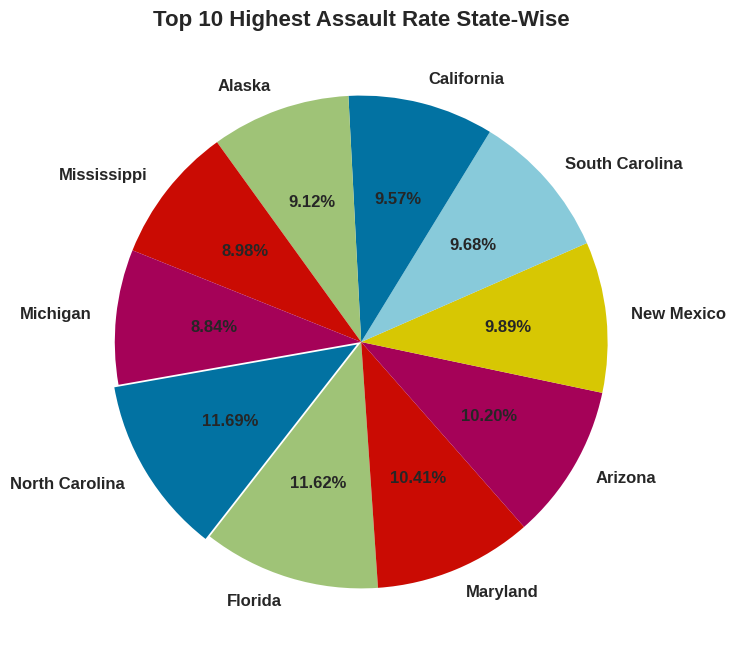

In [30]:
plt.figure(figsize = (8,8))
plt.pie(high_assault.Assault[:10], labels= high_assault.States[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold',})

plt.title("Top 10 Highest Assault Rate State-Wise", fontsize = 16, fontweight = 'bold')
plt.show()

In [31]:
low_assault = crime_data.sort_values('Assault', ascending = True, ignore_index=True)
low_assault.head()

,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Hawaii,5.3,46,83,20.2
2,Vermont,2.2,48,32,11.2
3,Wisconsin,2.6,53,66,10.8
4,Iowa,2.2,56,57,11.3


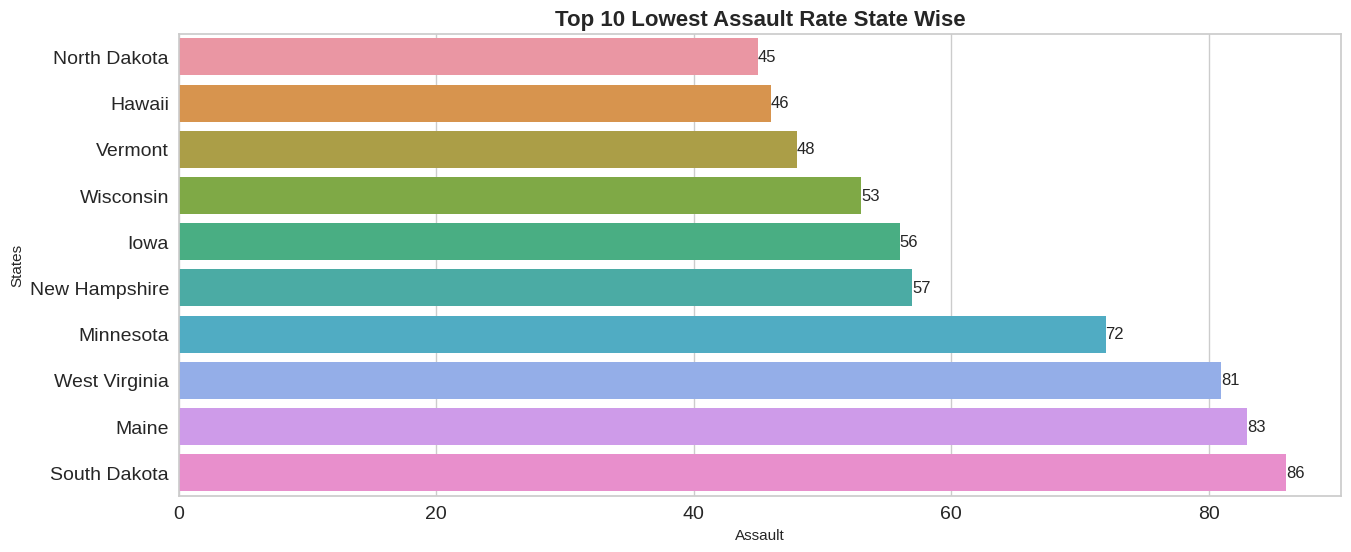

In [32]:
plt.figure(figsize=(15,6))
ax= sns.barplot(x=low_assault.Assault[:10], y = low_assault.States[:10])
plt.yticks(rotation = 0, fontsize= 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Lowest Assault Rate State Wise', fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

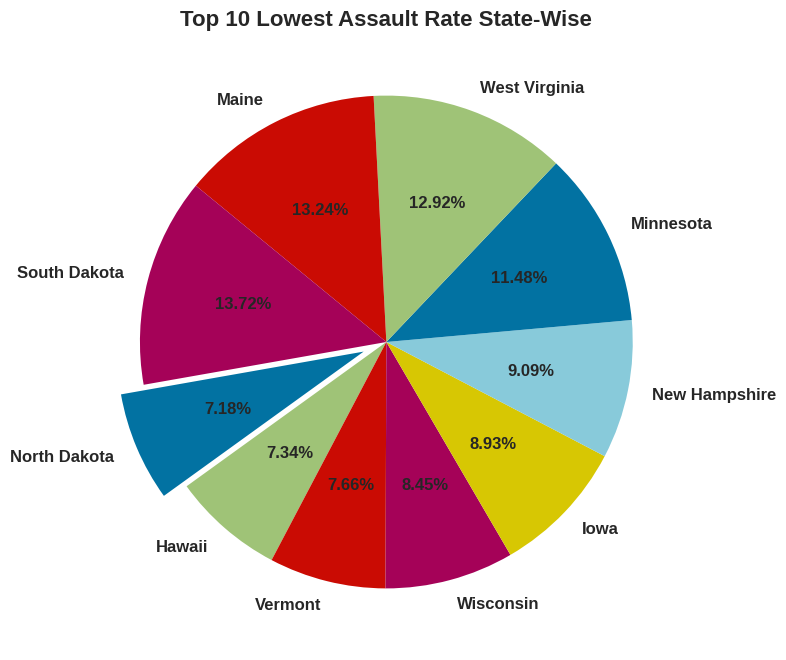

In [33]:
plt.figure(figsize = (8,8))
plt.pie(low_assault.Assault[:10], labels= low_assault.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190,
       textprops = {'size':'medium', 'fontweight':'bold',})

plt.title("Top 10 Lowest Assault Rate State-Wise", fontsize = 16, fontweight = 'bold')
plt.show()

## **Observations:**

Highest Assault Rate:North Carolina, Florida,Mary land, Arizona

Lowest Assault Rate: North Dakota, Hawaii, Vermont, Wisconsin

## **Rape Rate**

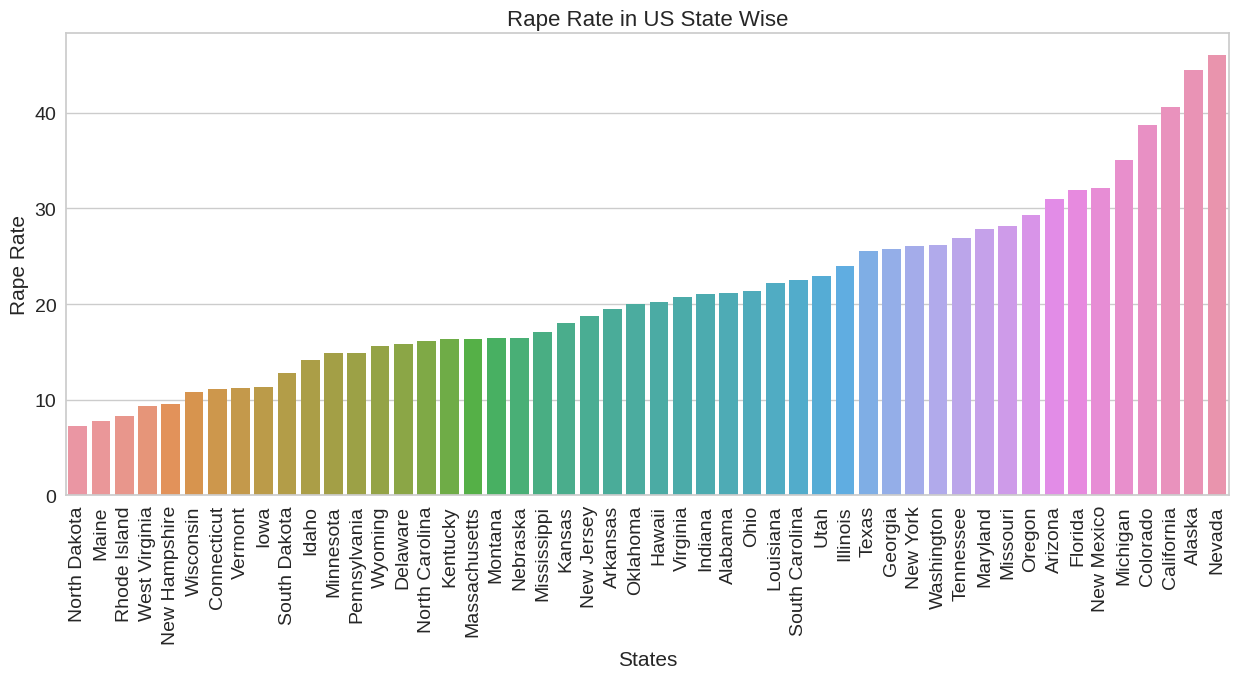

In [35]:
plt.figure(figsize=(15,6))
#Make Barplot and Sortbars
sns.barplot(x='States',y='Rape',data = crime_data, order = crime_data.sort_values('Rape').States)

#Set Labels
plt.xlabel('States',size= 15)
plt.ylabel("Rape Rate", size=15)
plt.yticks(rotation = 0,fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Rape Rate in US State Wise", size=16)
plt.show()


In [37]:
high_rape_rate = crime_data.sort_values("Rape",ascending=False, ignore_index=True)
high_rape_rate.head()

,States,Murder,Assault,UrbanPop,Rape
0,Nevada,12.2,252,81,46.0
1,Alaska,10.0,263,48,44.5
2,California,9.0,276,91,40.6
3,Colorado,7.9,204,78,38.7
4,Michigan,12.1,255,74,35.1


In [38]:
low_rape_rate = crime_data.sort_values("Rape",ascending=True, ignore_index=True)
low_rape_rate.head()

,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Maine,2.1,83,51,7.8
2,Rhode Island,3.4,174,87,8.3
3,West Virginia,5.7,81,39,9.3
4,New Hampshire,2.1,57,56,9.5


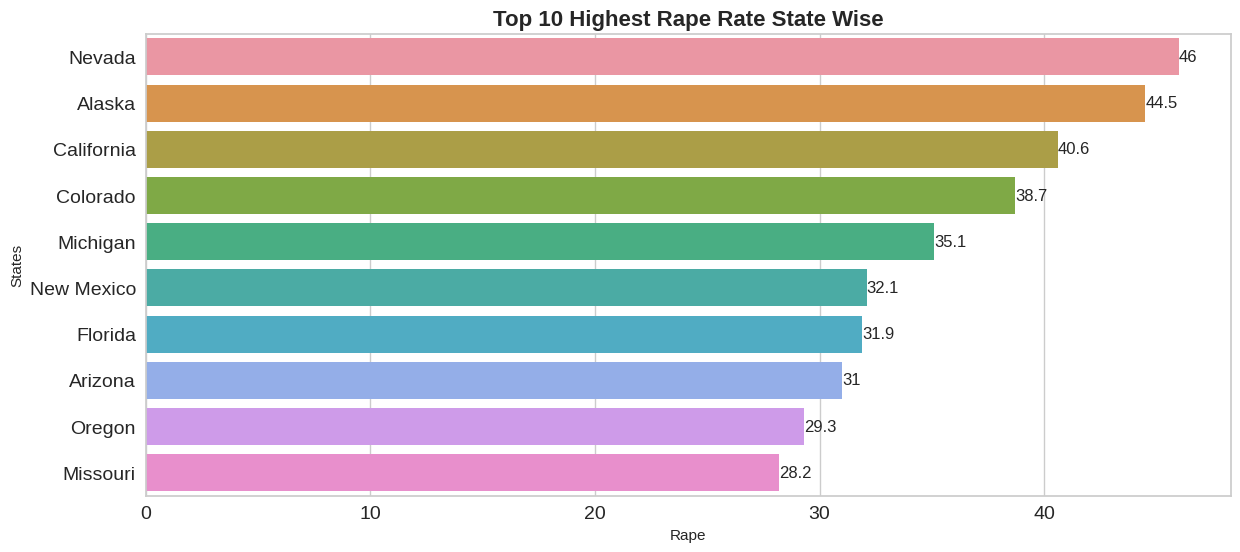

In [39]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = high_rape_rate.Rape[:10], y =high_rape_rate.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Highest Rape Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

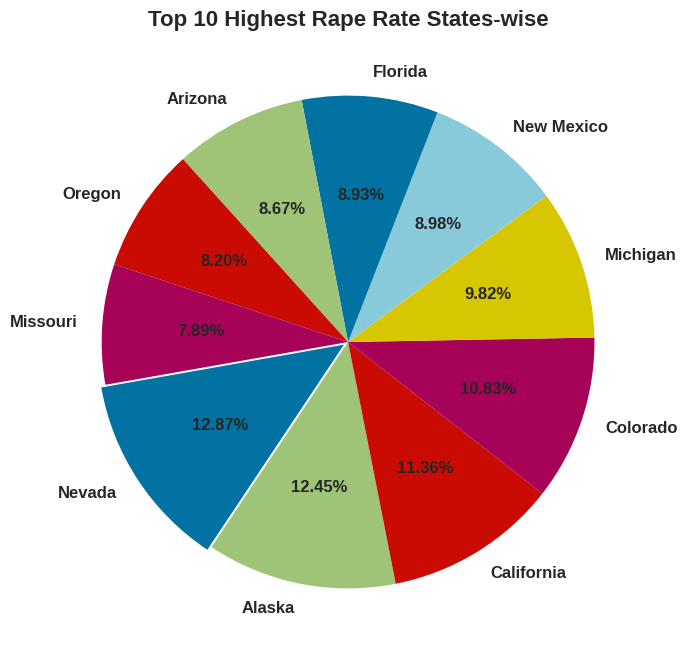

In [40]:
plt.figure(figsize = (8,8))
plt.pie(high_rape_rate.Rape[:10], labels= high_rape_rate.States[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190,
       textprops = {'size':'medium',
                   'fontweight':'bold'})

plt.title("Top 10 Highest Rape Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()

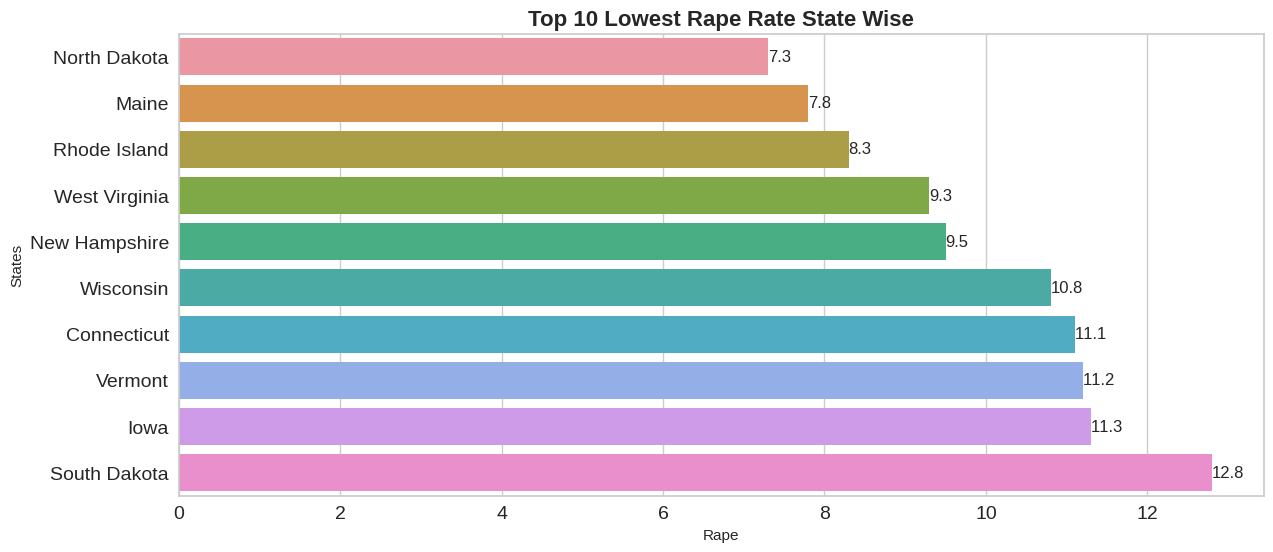

In [41]:
plt.figure(figsize=(14,6))
ax=sns.barplot(x=low_rape_rate.Rape[:10],y=low_rape_rate.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Lowest Rape Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

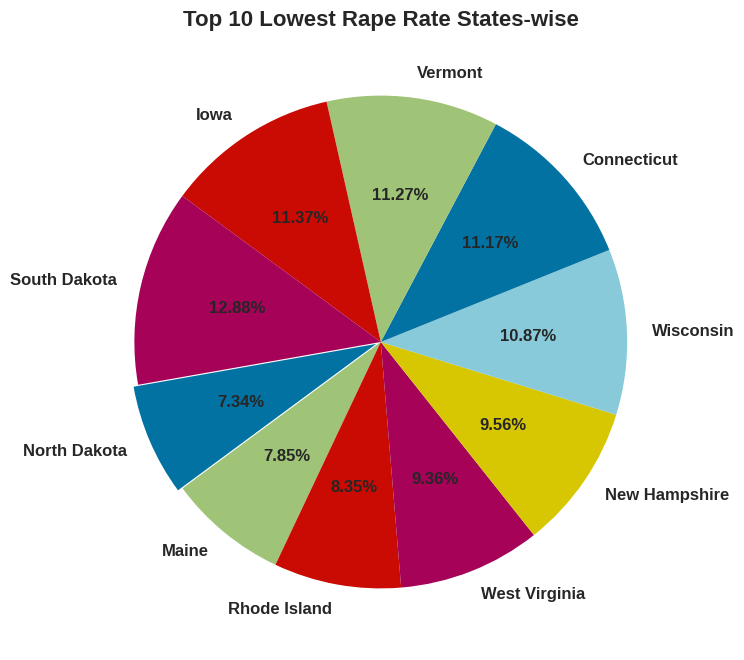

In [42]:
plt.figure(figsize = (8,8))
plt.pie(low_rape_rate.Rape[:10], labels= low_rape_rate.States[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Lowest Rape Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()

## **Observations:**

Highest Rape Rate : Nevada, Alaska,California,Colorado

Lowest Rape Rate : North Dakota, Maine, Rhode Island,West Virgina

### **Urban Population Rate**

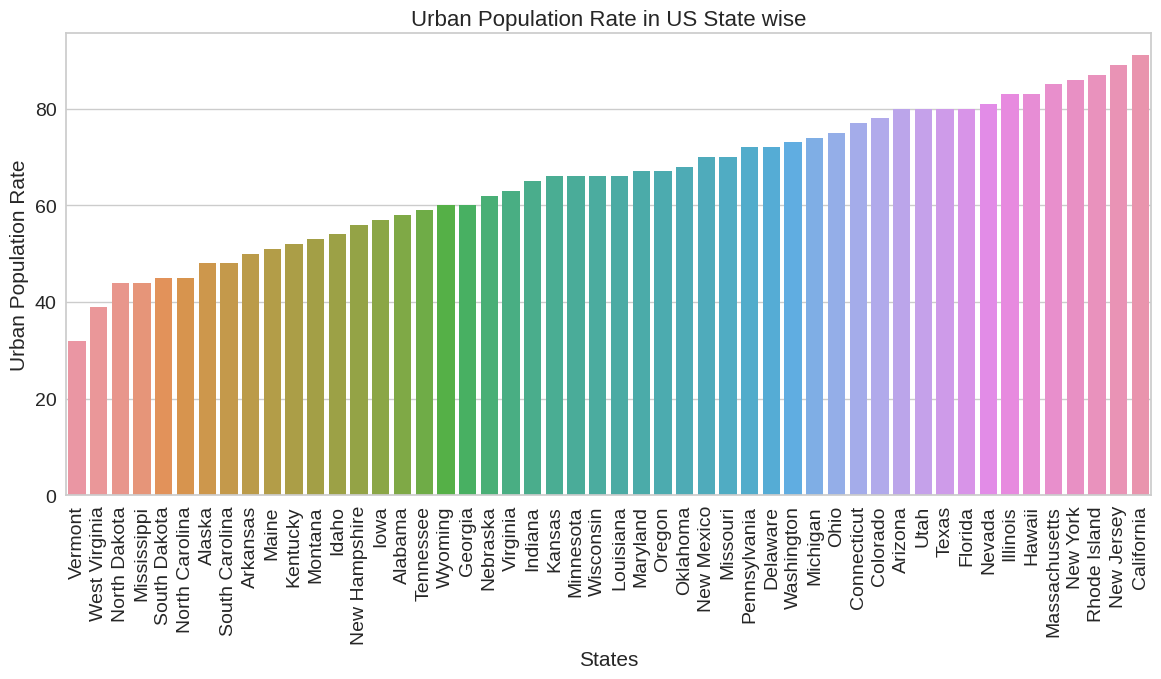

In [43]:
plt.figure(figsize=(14,6))
# make barplot and sort bars
sns.barplot(x='States', y="UrbanPop", data=crime_data, order=crime_data.sort_values('UrbanPop').States)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Urban Population Rate in US State wise", size=16)
plt.show()

In [44]:
high_population = crime_data.sort_values('UrbanPop',ascending=False, ignore_index=True)
high_population.head()

,States,Murder,Assault,UrbanPop,Rape
0,California,9.0,276,91,40.6
1,New Jersey,7.4,159,89,18.8
2,Rhode Island,3.4,174,87,8.3
3,New York,11.1,254,86,26.1
4,Massachusetts,4.4,149,85,16.3


In [45]:
low_population = crime_data.sort_values('UrbanPop',ascending=True, ignore_index=True)
low_population.head()

,States,Murder,Assault,UrbanPop,Rape
0,Vermont,2.2,48,32,11.2
1,West Virginia,5.7,81,39,9.3
2,North Dakota,0.8,45,44,7.3
3,Mississippi,16.1,259,44,17.1
4,South Dakota,3.8,86,45,12.8


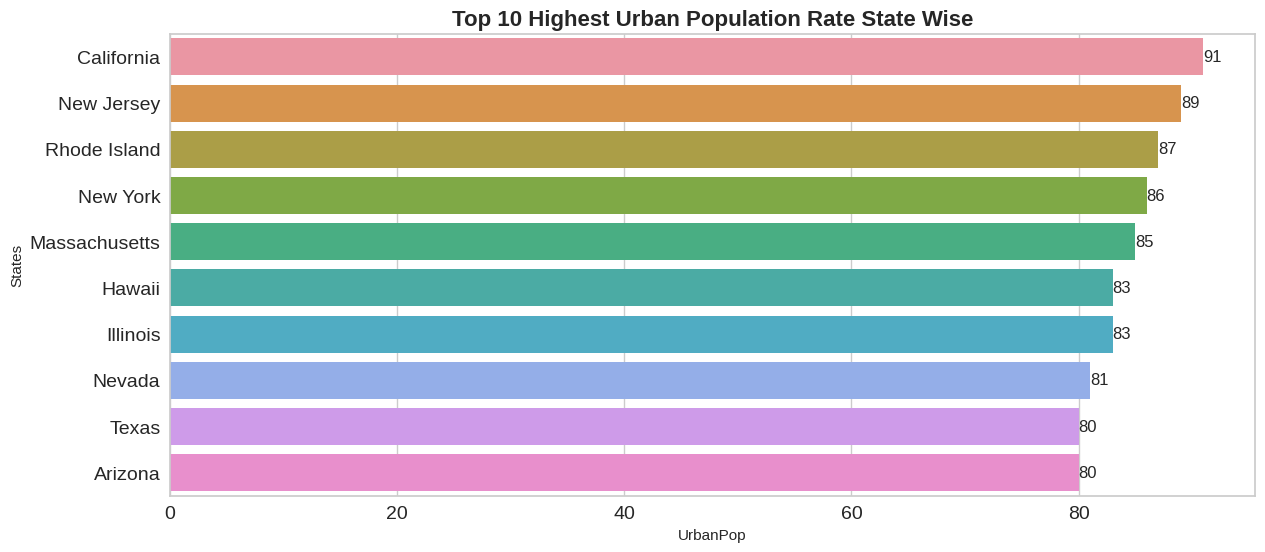

In [46]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = high_population.UrbanPop[:10], y = high_population.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Highest Urban Population Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

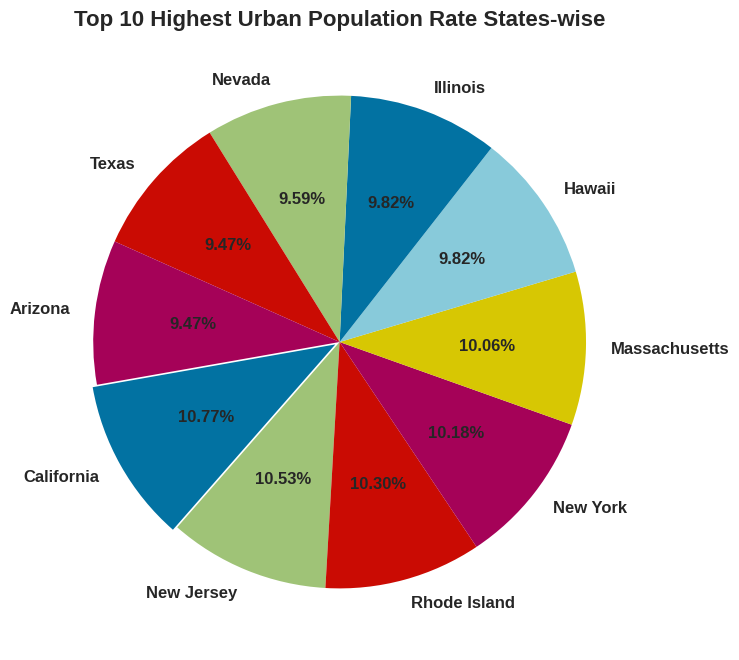

In [49]:
plt.figure(figsize=(15,8))
plt.pie(high_population.UrbanPop[:10],labels=high_population.States[:10],
         explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
         autopct = '%.2f%%',startangle=190, textprops = {'size':'medium','fontweight':'bold'})

plt.title("Top 10 Highest Urban Population Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()

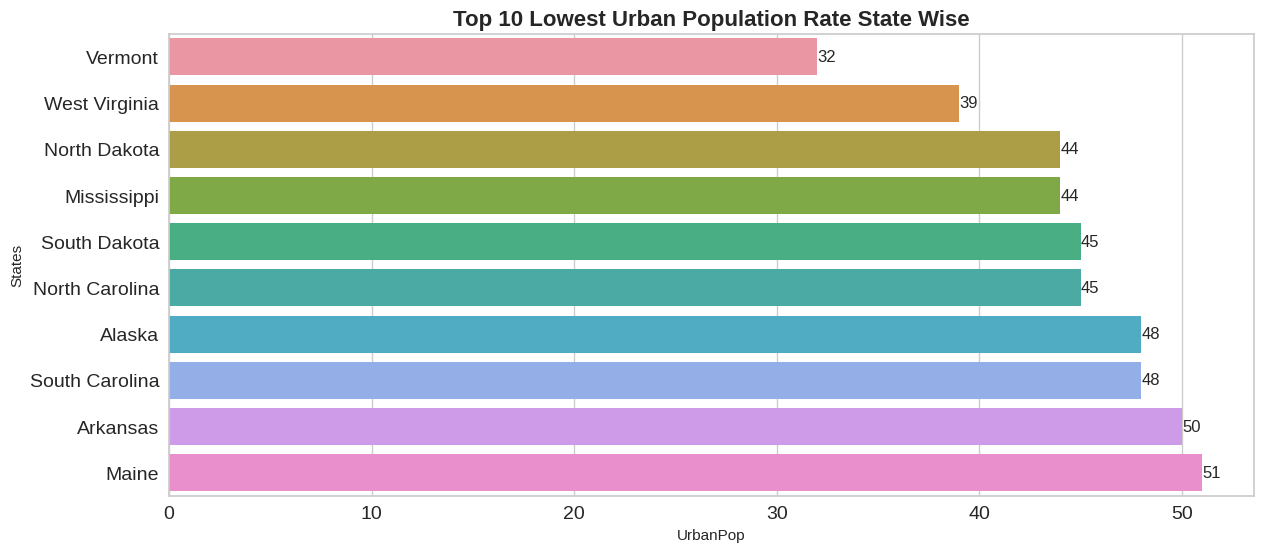

In [50]:
plt.figure(figsize = (14,6))
ax = sns.barplot(x = low_population.UrbanPop[:10], y = low_population.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 0, fontsize = 14)
plt.title('Top 10 Lowest Urban Population Rate State Wise',  fontsize = 16, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i)

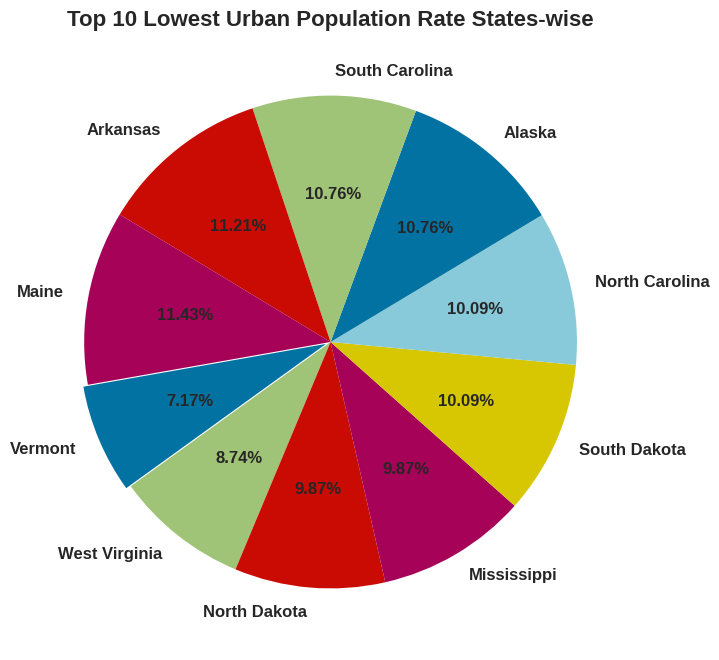

In [51]:
plt.figure(figsize = (8,8))
plt.pie(low_population.UrbanPop[:10], labels= low_population.States[:10],
       explode = [0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', startangle= 190, textprops = {'size':'medium', 'fontweight':'bold'})

plt.title("Top 10 Lowest Urban Population Rate States-wise", fontsize = 16, fontweight = 'bold')
plt.show()

## **Observations:**

Highest Urban Population Rate : California, New Jersey,Rhode Island,New York

Lowest Urban Population Rate : Vermount, West Virginia,North Dakota,Mississippi

In [52]:
#Data Preprocessing
crime_df = crime_data.set_index('States')
crime_df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [53]:
standard_scaler=StandardScaler()
std_crime=standard_scaler.fit_transform(crime_df)
std_crime.shape

(50, 4)

In [55]:
minmax = MinMaxScaler()
normal_crime = minmax.fit_transform(crime_df)
normal_crime.shape

(50, 4)

### **K-Means Clustering**

Elbow Method for Determining Cluster Amount

Standard Scaler Applied on Data

In [56]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_crime)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df

,Num_Clusters,Cluster_Errors
0,1,200.000000
1,2,104.961633
2,3,79.955482
3,4,57.672852
4,5,50.688170
5,6,43.901766
6,7,40.299719
7,8,34.466700
8,9,31.885357
9,10,28.587850


## **Within-Cluster SSC**

Use Elbow Graph to find optimum number of clusters (K value) from K values range

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS

Random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change.

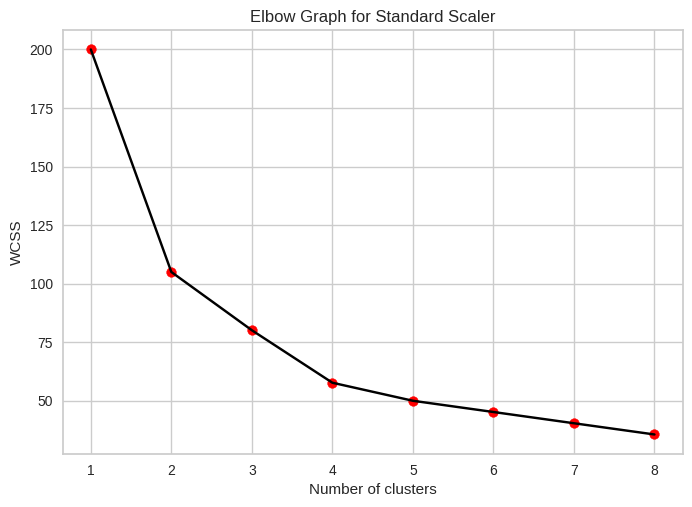

In [57]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_crime)
    wcss.append(kmeans.inertia_)
    
# Plot K values range V/S WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

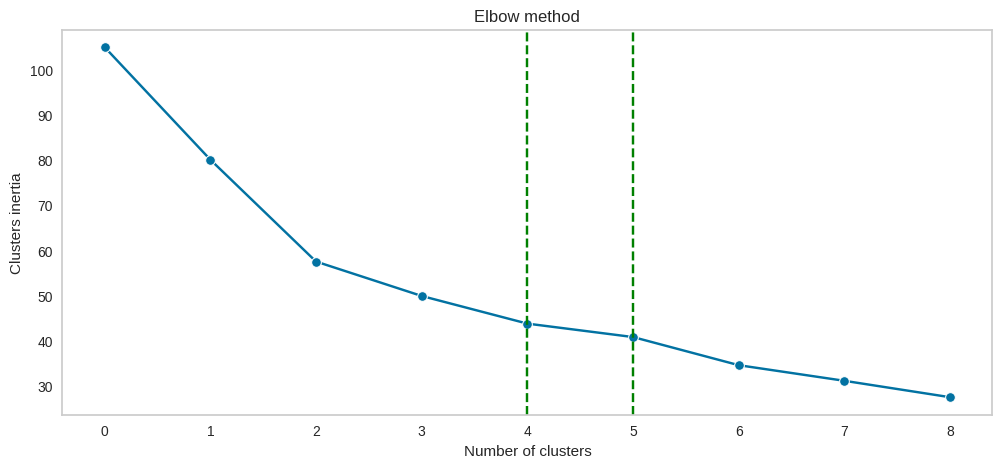

In [60]:
#from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_crime)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(std_crime, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot( clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Clusters inertia")
ax.axvline(4, ls="--", c="green")
ax.axvline(5, ls="--", c="green")
plt.grid()
plt.show()

There is no clear "elbow" visible. A choice of 4 or 5 clusters seems to be fair. Let's see the silhouette score.

### **Silhouette Score**

Getting number of clusters,n_clusters

Since true labels are not known..we will use Silhouette Coefficient (Clustering performance evaluation)


Elbow Plot for Standard Scaler data


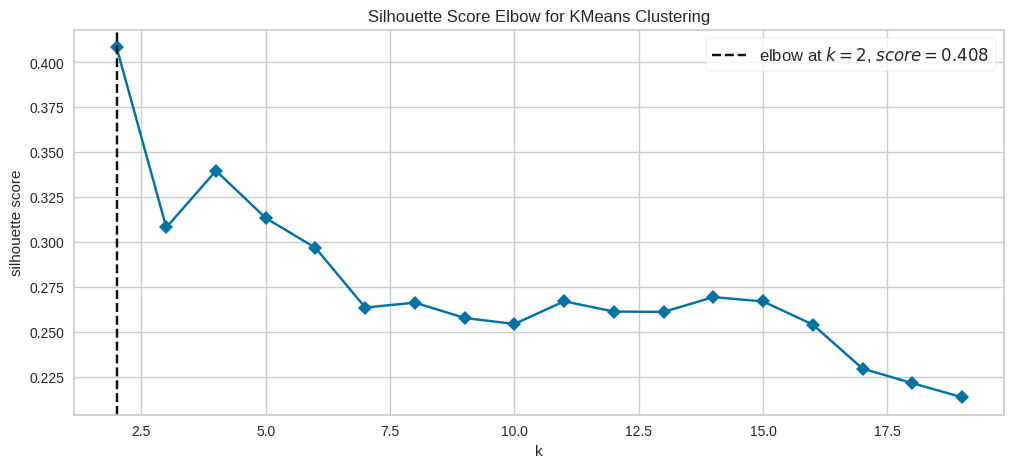

In [61]:
# Knee Elbow graph method
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
fig, ax = plt.subplots(figsize=(12,5))
print('Elbow Plot for Standard Scaler data')
visualizer.fit(std_crime)    
visualizer.poof()
plt.show()

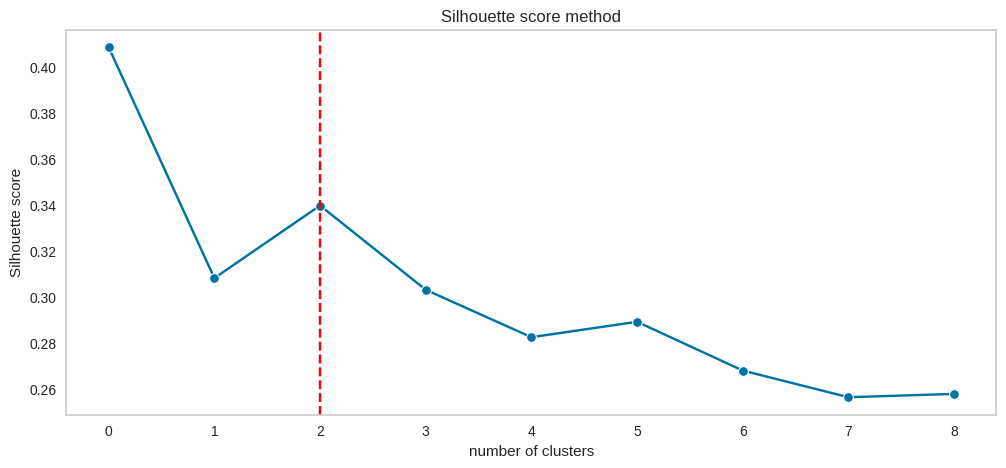

In [62]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot( s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

With the elbow method, the ideal number of clusters to use was 6.

We will also use the Silhouette score to determine an optimal number.

In [63]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_crime)
    sil_score1= silhouette_score(std_crime, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.33968891433344395
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263
For n_clusters = 6 The average silhouette_score is : 0.29910456843899946
For n_clusters = 7 The average silhouette_score is : 0.23035904501364113
For n_clusters = 8 The average silhouette_score is : 0.2732934287338534
For n_clusters = 9 The average silhouette_score is : 0.2518939934580804


## **According the the silhouette score of:**

The standardized data, although the ideal number of clusters is 2, with a score higher than other options, of 0.40. we will go for 3 number of clusters

**Build KMeans Cluster algorithm using K=3 and Standard Scaler Applied Dataset**

Number of clusters=3 so that we can use the same number of cluster in model building

In [64]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_crime)
y_predict_kmeans.shape

(50,)

In [65]:
# Cluster_Labels
y_predict_kmeans

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [66]:
model_kmeans.labels_

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [67]:
# cluster centres associated with each lables
model_kmeans.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.05377053,  1.07340253,  0.19371445,  0.86104144],
       [-0.41081687, -0.32571014,  0.4740874 , -0.20357044]])

### **Within Cluster Sum of Squared**

The lower values of inertia are better and zero is optimal.

Inertia is the sum of squared error for each cluster.

Therefore the smaller the inertia the denser the cluster(closer together all the points are)

In [68]:
model_kmeans.inertia_

80.0888613219962

In [69]:
crime_df['Kmeans_Label'] = model_kmeans.labels_

In [70]:
crime_df.groupby('Kmeans_Label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Kmeans_Label,,,,
0,3.600000,78.538462,52.076923,12.176923
1,12.331579,259.315789,68.315789,29.215789
2,6.016667,143.888889,72.333333,19.344444


In [71]:
crime_df[crime_df['Kmeans_Label']==0]

,Murder,Assault,UrbanPop,Rape,Kmeans_Label
States,,,,,
Idaho,2.6,120,54,14.2,0
Iowa,2.2,56,57,11.3,0
Kentucky,9.7,109,52,16.3,0
Maine,2.1,83,51,7.8,0
Minnesota,2.7,72,66,14.9,0
Montana,6.0,109,53,16.4,0
Nebraska,4.3,102,62,16.5,0
New Hampshire,2.1,57,56,9.5,0
North Dakota,0.8,45,44,7.3,0


In [72]:
crime_df[crime_df['Kmeans_Label']==1]

,Murder,Assault,UrbanPop,Rape,Kmeans_Label
States,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,1
Illinois,10.4,249,83,24.0,1
Louisiana,15.4,249,66,22.2,1


In [73]:
crime_df[crime_df['Kmeans_Label']==2]

,Murder,Assault,UrbanPop,Rape,Kmeans_Label
States,,,,,
Arkansas,8.8,190,50,19.5,2
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,2
Hawaii,5.3,46,83,20.2,2
Indiana,7.2,113,65,21.0,2
Kansas,6.0,115,66,18.0,2
Massachusetts,4.4,149,85,16.3,2
Missouri,9.0,178,70,28.2,2
New Jersey,7.4,159,89,18.8,2


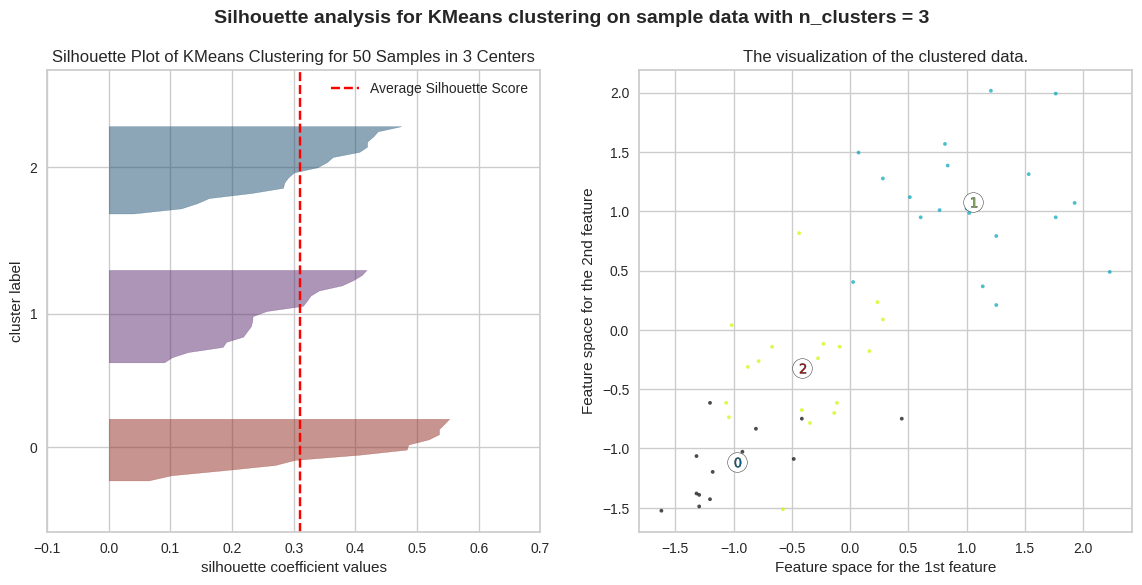

In [74]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(14,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(std_crime)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 3) # 6 is number of clusters
ax2.scatter(std_crime[:, 0], std_crime[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 3), fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

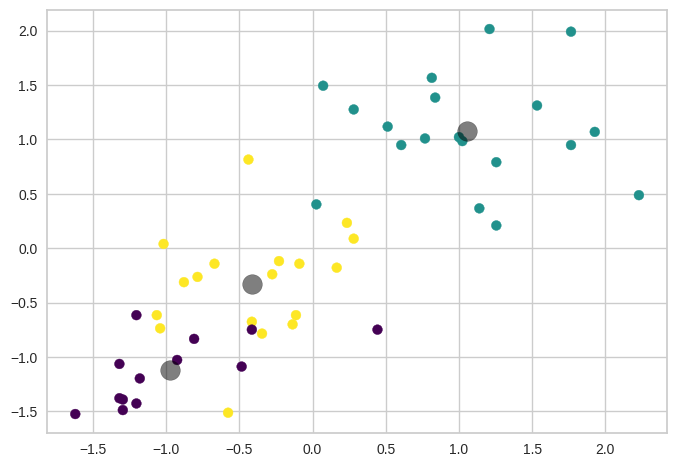

In [75]:
#Visualise the data we reduced to 2 sets
plt.scatter(std_crime[:,0], std_crime[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")
centers = model_kmeans.cluster_centers_                                 

# We want to create 2 centers and show them on the visual.
plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)
plt.show()

## **Observations:**

The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.

The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.

The Cities in Cluster-2 seems to have Moderate crime rates and can be regarded as Moderate-Zone

Elbow Method and Silhouette Score on MinMaxScaler Applied Data

In [76]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(norm_crime)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,13.184123
1,2,6.596894
2,3,5.010878
3,4,3.683456
4,5,3.183158
5,6,2.833147
6,7,2.603545
7,8,2.371487
8,9,2.114875
9,10,1.896845


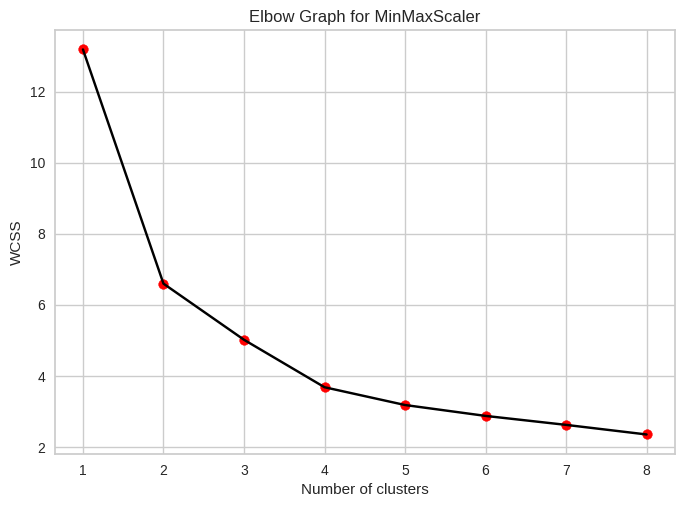

In [77]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(norm_crime)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow Plot for MinMaxScaler data


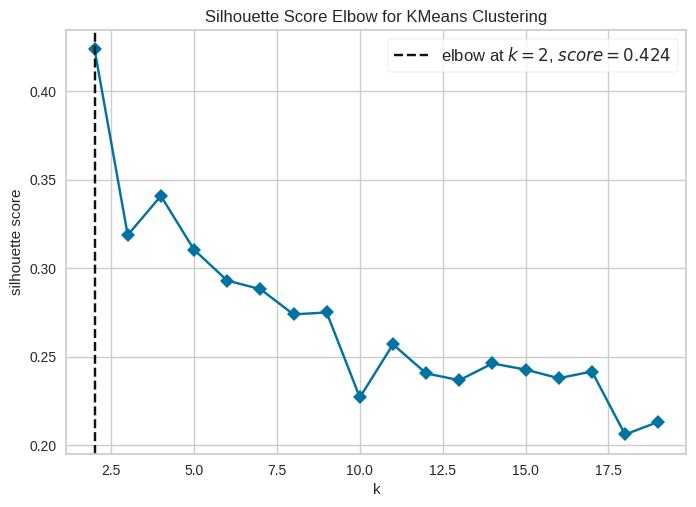

In [78]:
#Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)

# Fit the data and visualize
print('Elbow Plot for MinMaxScaler data')
visualizer.fit(norm_crime)    
visualizer.poof()
plt.show()

In [79]:
#With the elbow method, the ideal number of clusters to use was 6.
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(norm_crime)
    sil_score1= silhouette_score(norm_crime, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.42364457559625074
For n_clusters = 3 The average silhouette_score is : 0.3187755079997931
For n_clusters = 4 The average silhouette_score is : 0.34089035600743633
For n_clusters = 5 The average silhouette_score is : 0.3062742525752849
For n_clusters = 6 The average silhouette_score is : 0.27035587392051724
For n_clusters = 7 The average silhouette_score is : 0.2371119747926814
For n_clusters = 8 The average silhouette_score is : 0.24422345369104229
For n_clusters = 9 The average silhouette_score is : 0.23181794623773663


**According the the silhouette score of:**

The MinMax Scaler Applied data, the ideal number of clusters is 2, with a score higher than other options, of 0.42, but if you notice the number of cluster 4 has also the best variation within cluster and between cluster with zero to no values going towards -1 and no mismatch in cluster segregation than the consecutive rest

If we check silhouette score with Normalize data kmeans model 0.42>0.40 .Best score always close to +1.

**Build KMeans Cluster algorithm using K=2 and MinMaxScaler Applied Dataset**

We have found good number of cluster = 2 we can use that number for building model

In [80]:
model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(norm_crime)
y_predict_kmeans.shape

(50,)

In [81]:
# these are nothing but cluster labels...
y_predict_kmeans

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [82]:
model_kmeans.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [83]:
# cluster centres associated with each lables
model_kmeans.cluster_centers_

array([[0.24518072, 0.23778539, 0.53615819, 0.22334195],
       [0.68463855, 0.72003425, 0.61694915, 0.56498708]])

**Within-Cluster SS(Sum of Squared)**

The lower values of inertia are better and zero is optimal.

Inertia is the sum of squared error for each cluster.

Therefore the smaller the inertia the denser the cluster(closer together all the points are)

In [84]:
model_kmeans.inertia_

6.596893867946196

In [85]:
#Assign clusters to the data set
crime_df['Kmeans_Label'] = model_kmeans.labels_

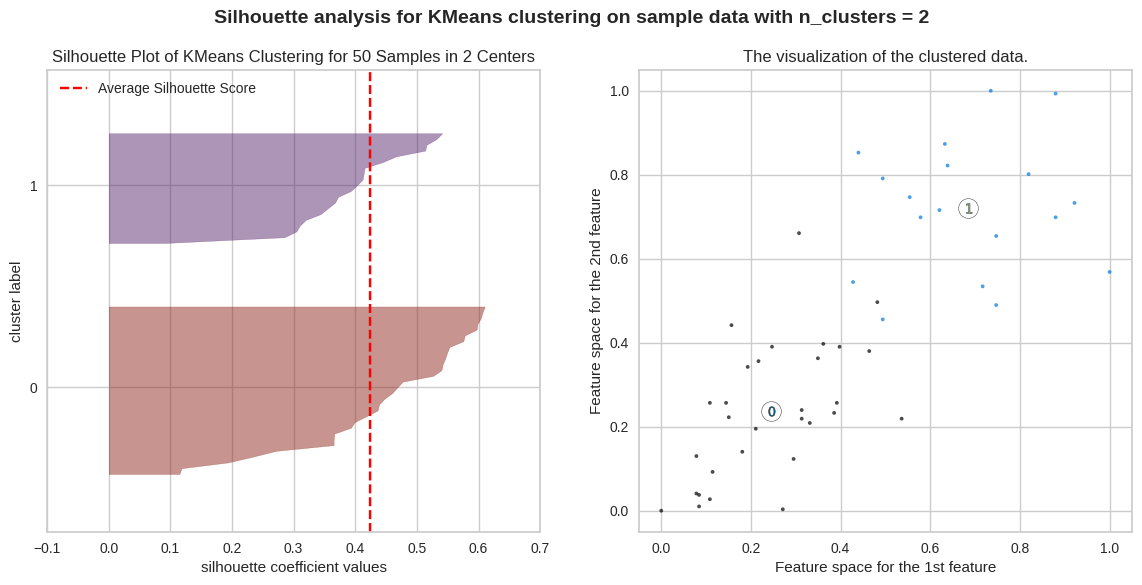

In [86]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(14,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(norm_crime)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 4) # 6 is number of clusters
ax2.scatter(norm_crime[:, 0], norm_crime[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 2),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

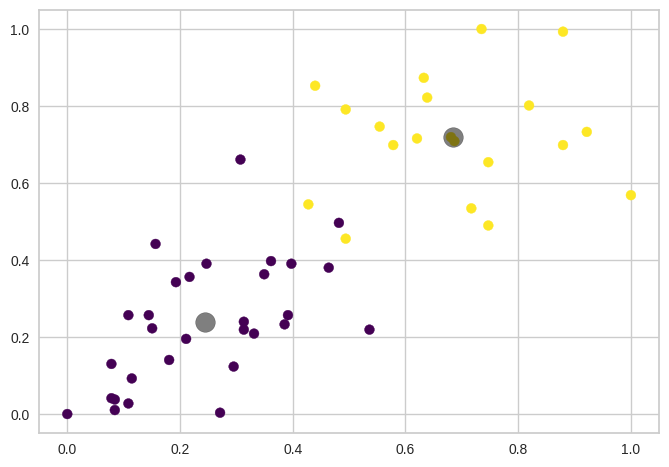

In [87]:
plt.scatter(norm_crime[:,0], norm_crime[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")
centers = model_kmeans.cluster_centers_

# We want to create 2 centers and show them on the visual.
plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)
plt.show()

In [88]:
# Group data by Clusters (K=6)
crime_df.groupby('Kmeans_Label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Kmeans_Label,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


**We can now clearly see the 2 number of clusters formed, which can be described as under**

Cluster0, Safe Zone Defines the group of Urban States with Lowest of Crimes

Cluster1, Danger Zone Defines the group of Urban States with Highest Rate of Crimes

### **Hierarchical Clustering Algorithm**

Dendogram on MinMaxScaler Applied on Dataset

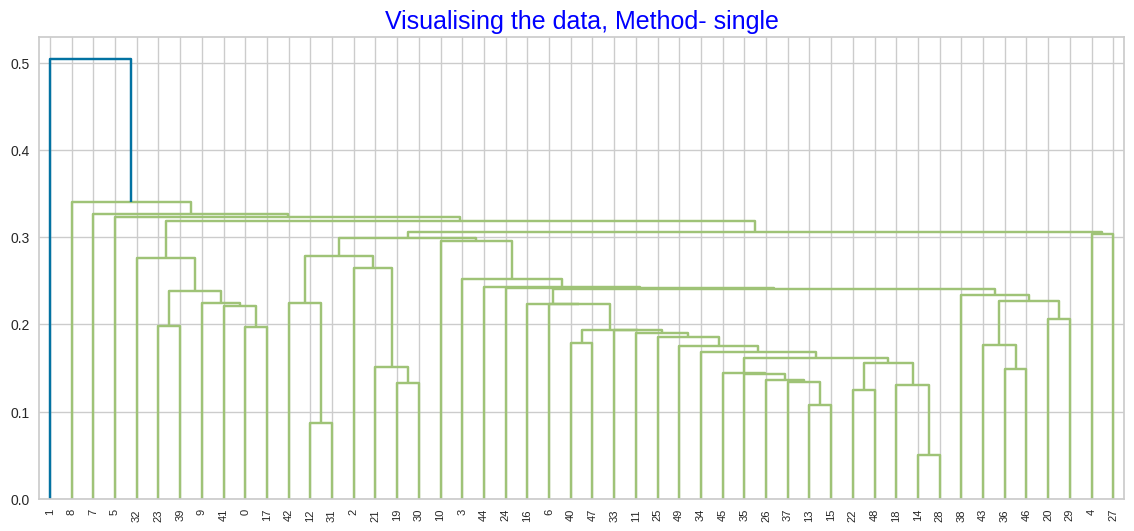

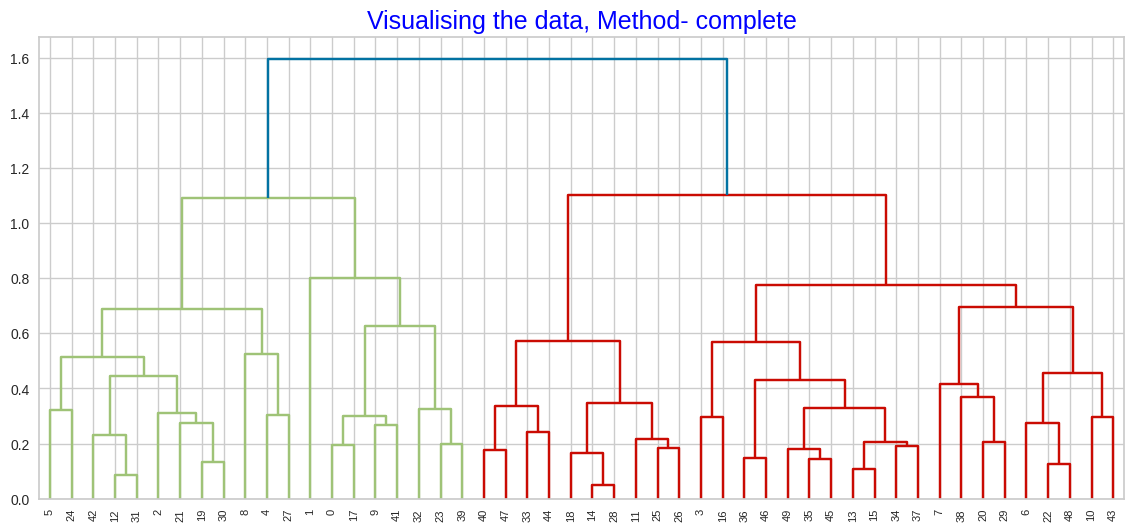

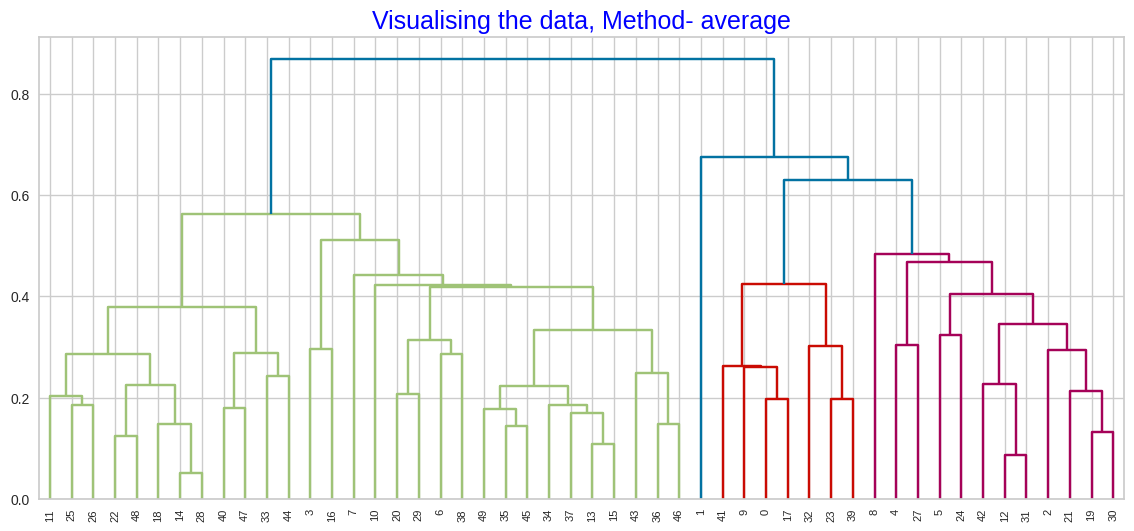

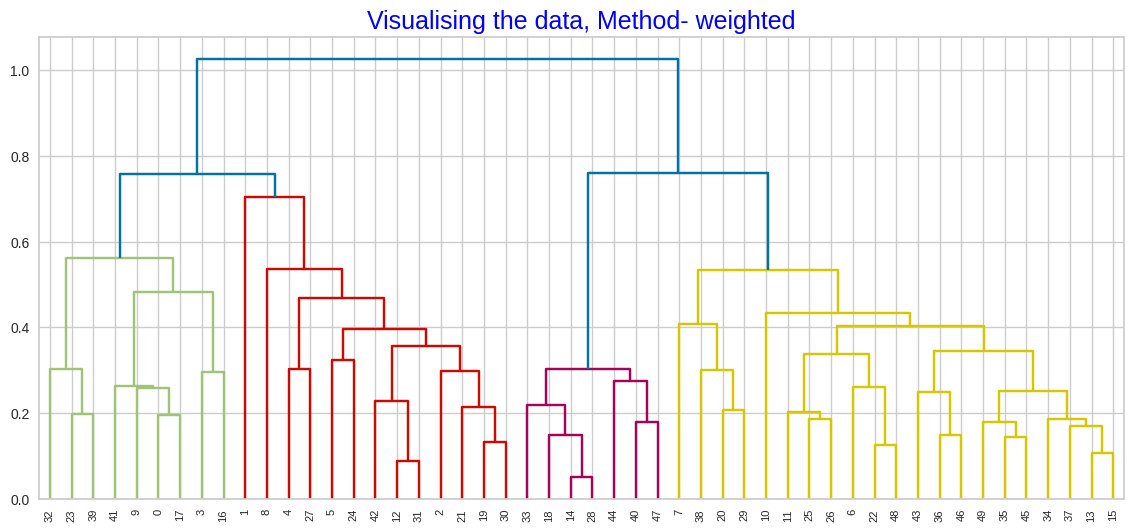

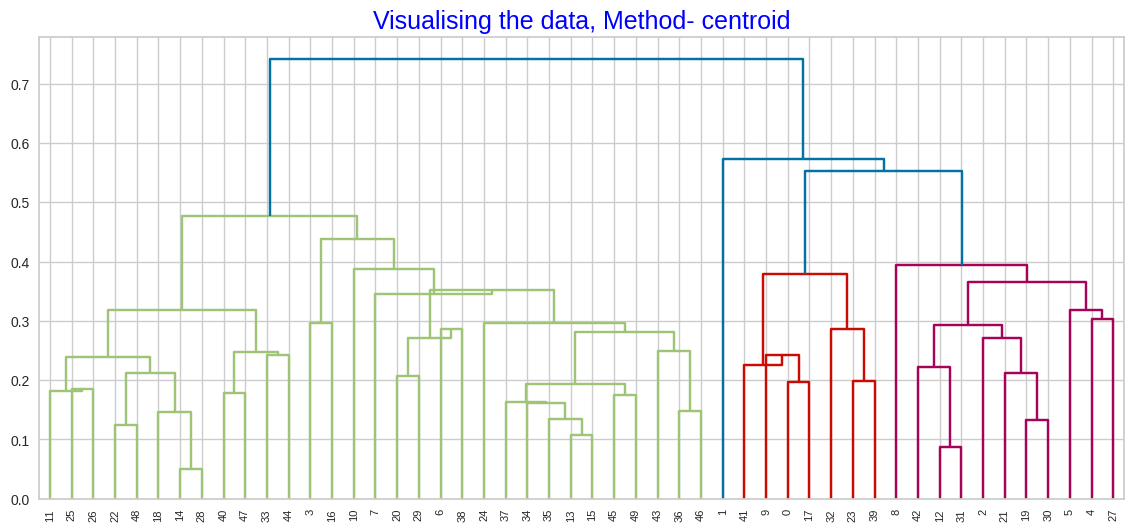

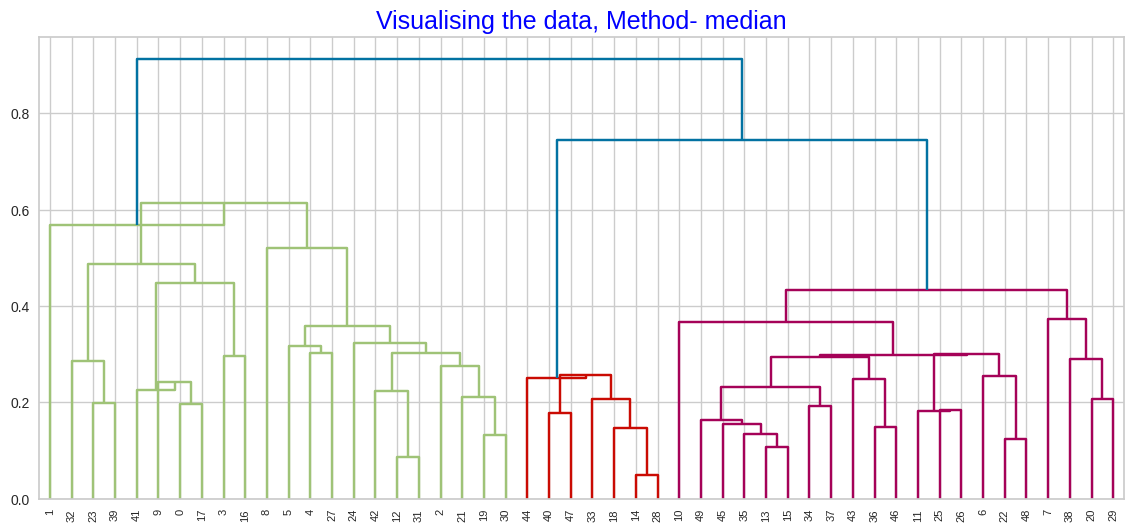

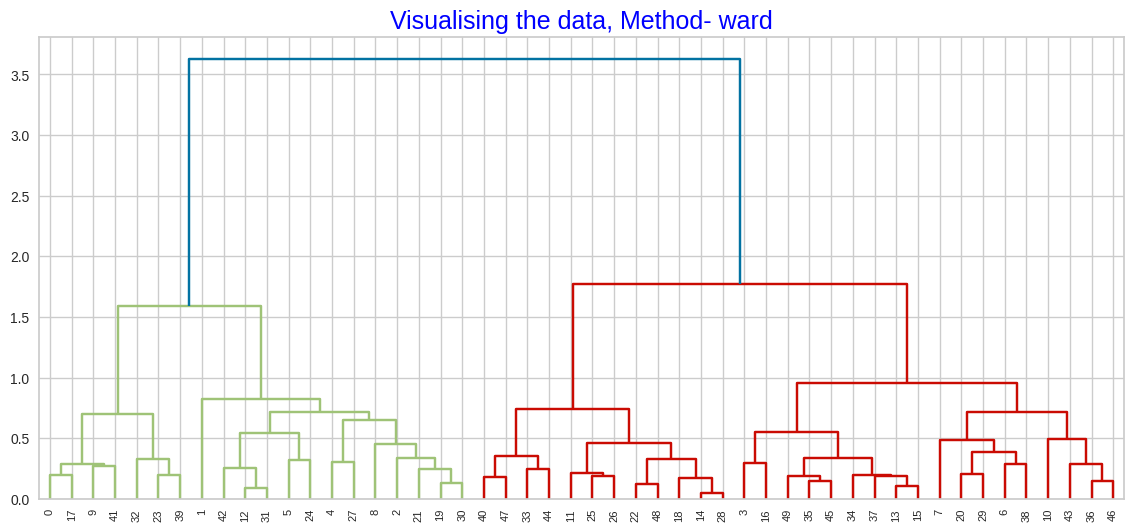

In [89]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(14,6))     
    dict = {'fontsize':18,'fontweight' :16, 'color' : 'blue'}  
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(norm_crime, method = methods,optimal_ordering=False))

In [90]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(norm_crime)
        silhouette_score1 = silhouette_score(norm_crime, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- average : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- single : 0.21033337025958487

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31916915428121284
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.30877213909512063
For n_clusters = 3 The average silhouette_score with linkage- average : 0.35149572430421583
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14223288708185444

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3298707379986785
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.3060729442426308
For n_clusters = 4 The average silhouette_score with linkage- average : 0.36992391140277

**The seperation in Each Method indicate that 2 as the optimal number for clusters**.

Dendrogram on Standard Scaler Applied on Data

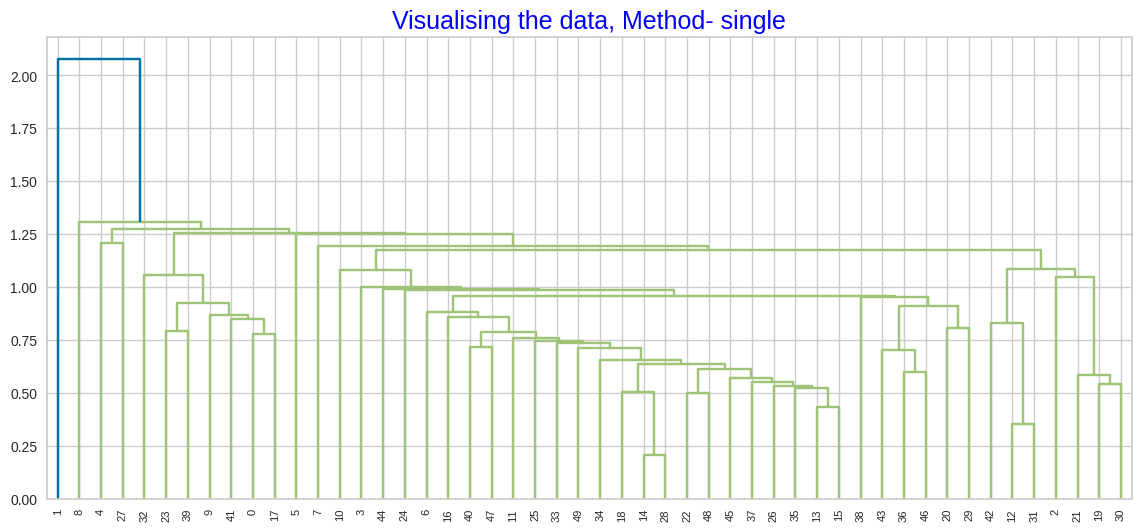

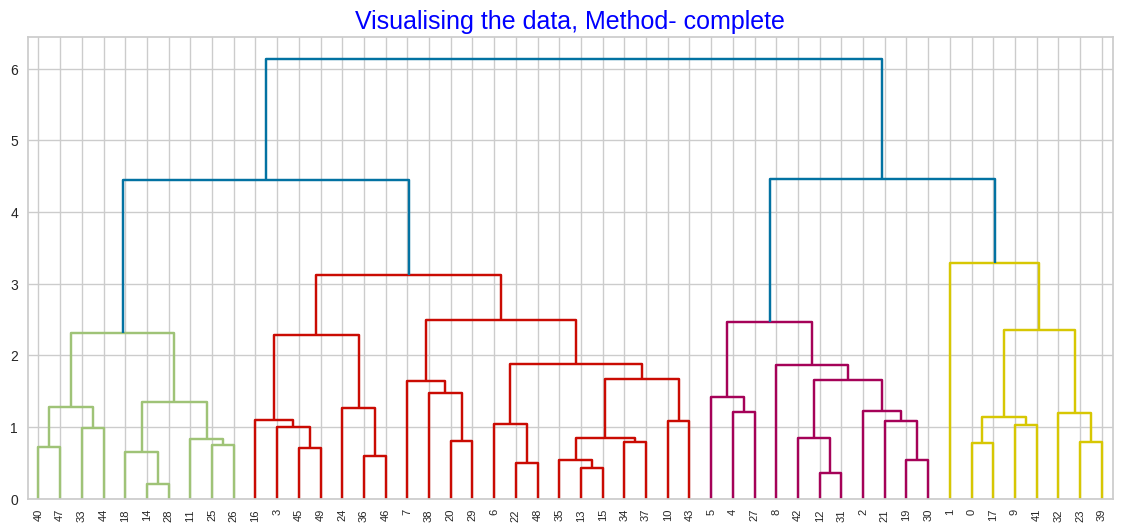

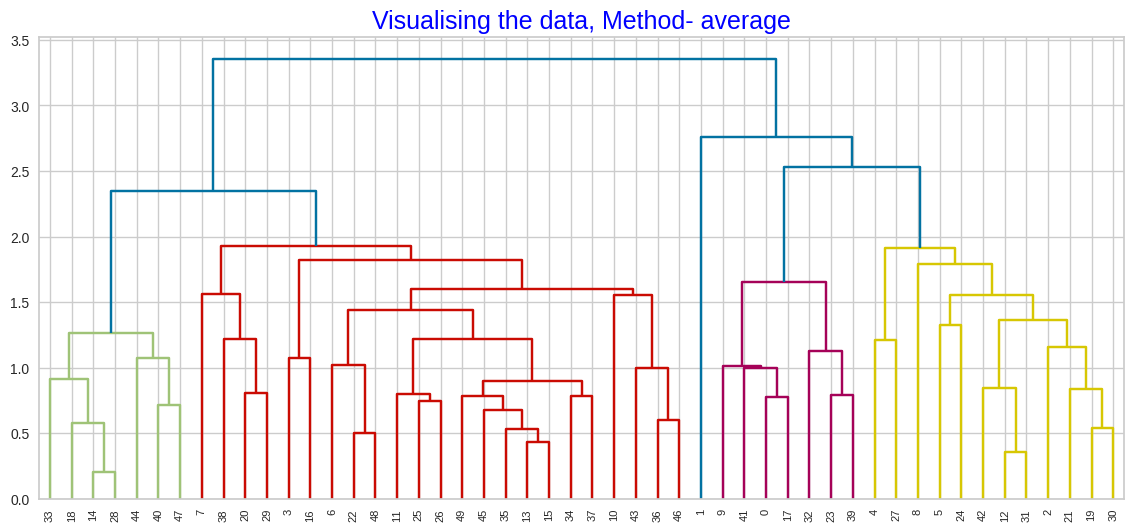

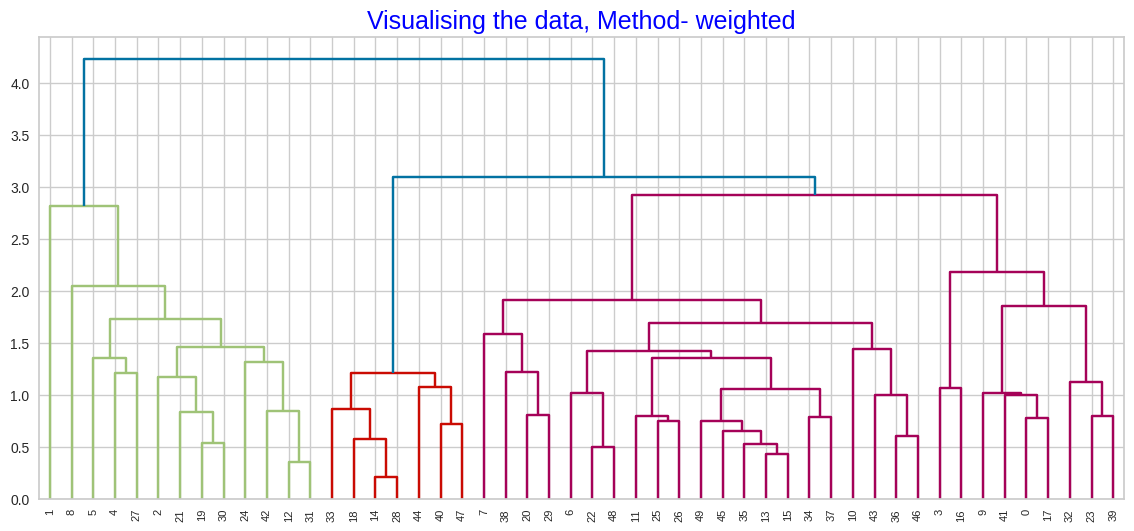

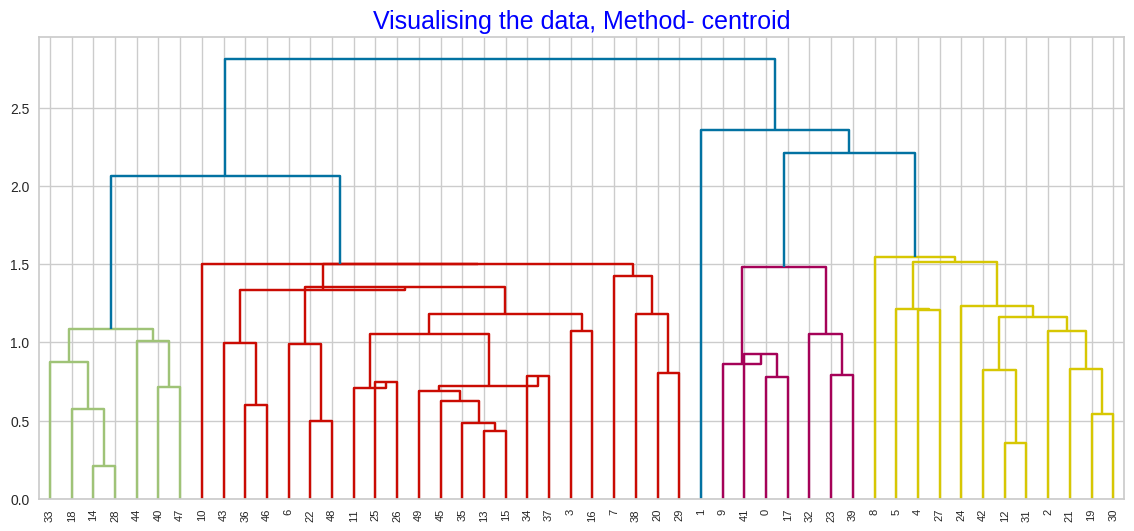

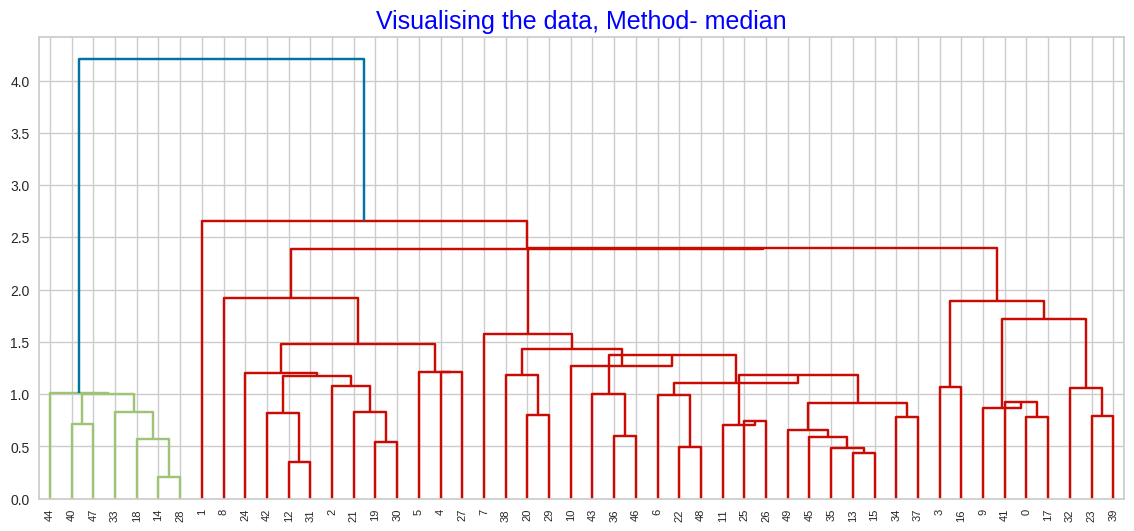

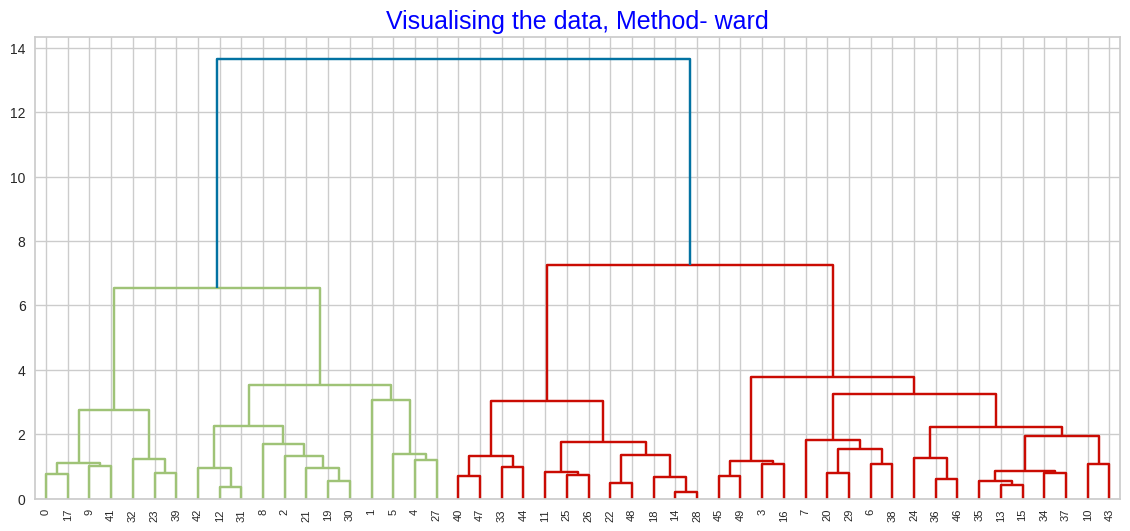

In [91]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(14,6))     
    dict = {'fontsize':18,'fontweight' :16, 'color' : 'blue'}  
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(std_crime, method = methods,optimal_ordering=False))

In [92]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(std_crime)
        silhouette_score2 = silhouette_score(std_crime, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4084890326217641
For n_clusters = 2 The average silhouette_score with linkage- single : 0.23455598753159795

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31036358174027895
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.36924314190439733
For n_clusters = 3 The average silhouette_score with linkage- average : 0.34863679190476177
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14582343625170263

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3370187183556962
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.31595507426164543
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3636819420151221

**Run Hierarchical Clustering.(Agglomerative Clustering)**

In [93]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(norm_crime)
print(y_pred_hie.shape)
y_pred_hie

(50,)


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [94]:
# Number Of Clusters
agg_clustering.n_clusters_

2

In [95]:
# Clustering Score
(silhouette_score(norm_crime, agg_clustering.labels_)*100).round(3)

42.364

## Putting Cluster lables into original dataset And analysis of the same

In [96]:
# Concating Labels with main dataset copy
crime_df['Hierarchical_Labels'] = agg_clustering.labels_
crime_df.groupby('Hierarchical_Labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_Label
,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,
0,4.870,114.433333,63.633333,15.943333,0.0
1,12.165,255.250000,68.400000,29.165000,1.0


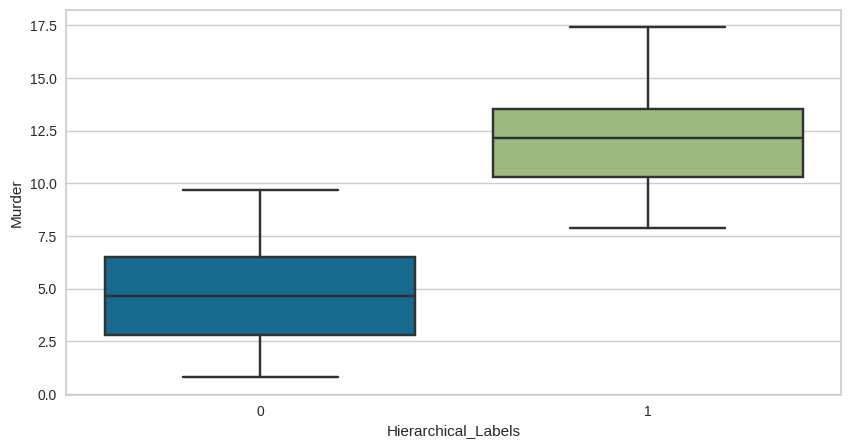

In [97]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_Labels', y='Murder', data= crime_df)
plt.show()

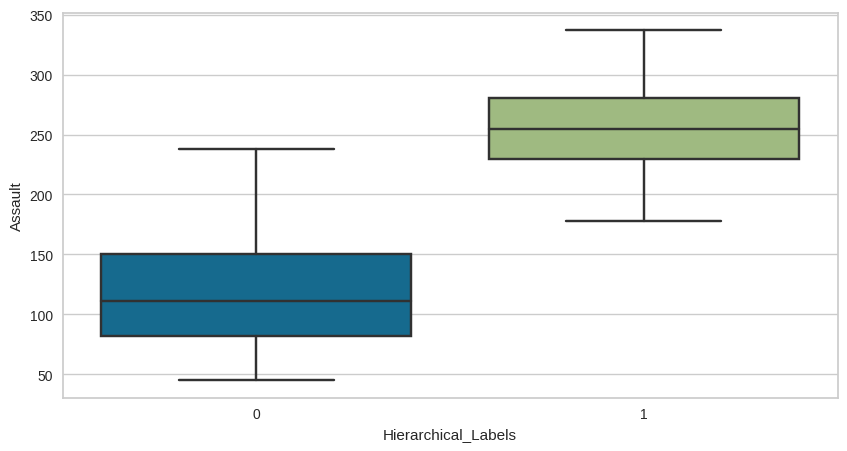

In [98]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_Labels', y='Assault', data= crime_df)
plt.show()

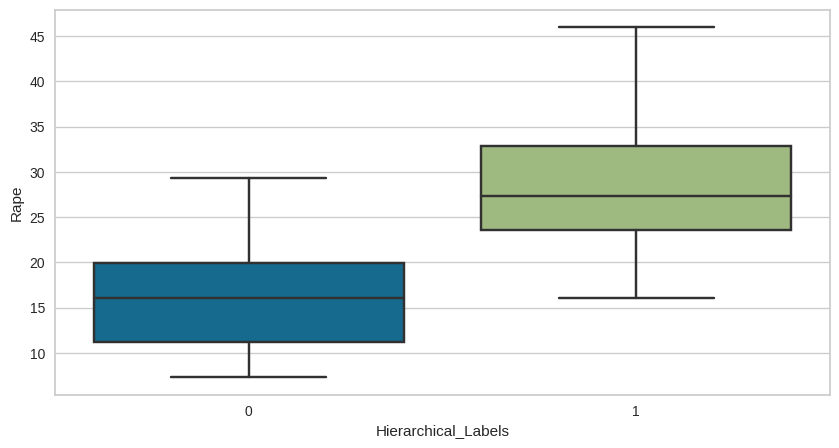

In [99]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_Labels', y='Rape', data= crime_df)
plt.show()

### **Observations:**

The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.

The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.

### **DBSCAN - (Density Based Spatial Clustering of Applications with Noise)**

In [101]:
from itertools import product

eps_values = np.arange(0.25,2,0.25) # eps values to be investigated
min_samples = np.arange(1,3)# min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_crime)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_crime, DBS_clustering.labels_))

### Collecting number of generated clusters.

A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


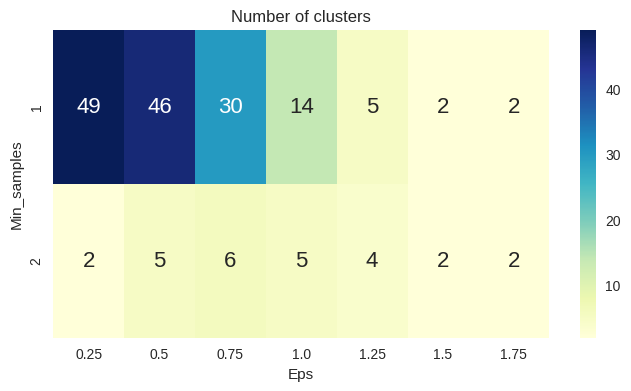

In [102]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

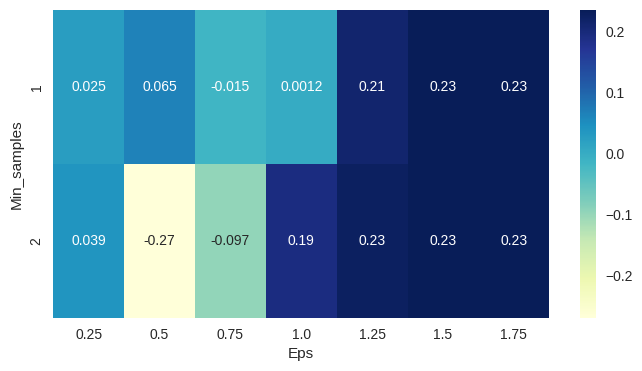

In [103]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [104]:
epsilon = [0.25,0.50,0.75,1,1.25,1.50,1.75,2]
min_samples = [1,2]

sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_crime)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(std_crime, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2346


In [105]:
dbscan = DBSCAN(eps=1.5, min_samples=1) # min_samples = number of columns  or len(dataset.columns)* 3
dbscan.fit(std_crime)

DBSCAN(eps=1.5, min_samples=1)

In [106]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [107]:
# Concating Labels with main dataset copy
crime_df['DBSCAN_Labels'] = dbscan.labels_
crime_df.head()

,Murder,Assault,UrbanPop,Rape,Kmeans_Label,Hierarchical_Labels,DBSCAN_Labels
States,,,,,,,
Alabama,13.2,236,58,21.2,1,1,0
Alaska,10.0,263,48,44.5,1,1,1
Arizona,8.1,294,80,31.0,1,1,0
Arkansas,8.8,190,50,19.5,0,0,0
California,9.0,276,91,40.6,1,1,0


In [108]:
crime_df.groupby('DBSCAN_Labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_Label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean
DBSCAN_Labels,,,,,,
0,7.742857,168.877551,65.897959,20.757143,0.387755,0.387755
1,10.000000,263.000000,48.000000,44.500000,1.000000,1.000000


In [109]:
print("Silhouette Coefficient: %0.3f" % silhouette_score(std_crime, dbscan.labels_))

Silhouette Coefficient: 0.235


In [110]:
from itertools import product

eps_values = np.arange(0.25,0.75,0.25) # eps values to be investigated
min_samples = np.arange(1,3)# min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(norm_crime)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(norm_crime, DBS_clustering.labels_))

A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


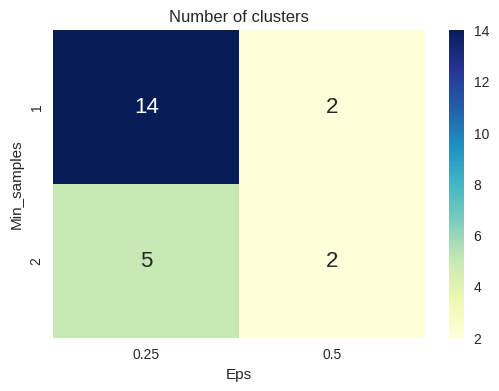

In [111]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

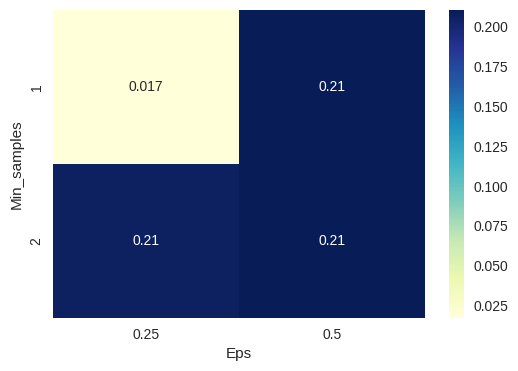

In [112]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [113]:
epsilon = [0.25,0.5]
min_samples = [1,2]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(norm_crime)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(norm_crime, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2103


In [114]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [115]:
# Concating Labels with main dataset copy
crime_df['DBSCAN_Labels'] = dbscan.labels_
crime_df.head()

,Murder,Assault,UrbanPop,Rape,Kmeans_Label,Hierarchical_Labels,DBSCAN_Labels
States,,,,,,,
Alabama,13.2,236,58,21.2,1,1,0
Alaska,10.0,263,48,44.5,1,1,1
Arizona,8.1,294,80,31.0,1,1,0
Arkansas,8.8,190,50,19.5,0,0,0
California,9.0,276,91,40.6,1,1,0


In [116]:
crime_df.groupby('DBSCAN_Labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_Label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean
DBSCAN_Labels,,,,,,
0,7.742857,168.877551,65.897959,20.757143,0.387755,0.387755
1,10.000000,263.000000,48.000000,44.500000,1.000000,1.000000


In [117]:
# Sorting elements based on cluster label assigned and taking average for insights.
cluster1 = pd.DataFrame(crime_df.loc[crime_df.DBSCAN_Labels==0].mean(),columns= ['Cluster1_Avg'])
cluster2 = pd.DataFrame(crime_df.loc[crime_df.DBSCAN_Labels==1].mean(),columns= ['Cluster2_Avg'])
avg_crime = pd.concat([cluster1,cluster2],axis=1)
avg_crime


,Cluster1_Avg,Cluster2_Avg
Murder,7.742857,10.0
Assault,168.877551,263.0
UrbanPop,65.897959,48.0
Rape,20.757143,44.5
Kmeans_Label,0.387755,1.0
Hierarchical_Labels,0.387755,1.0
DBSCAN_Labels,0.000000,1.0


## **Conclusion:**

I have applied EDA to analyze dataset. Discovered correlation between diff variables and found colinearity.

Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively.

I have used & analyzed Three clustering techniques here. i) KMeans, ii) Hierarchical Clusterig & iii) DBSCAN.

By applying clustering on different transformation data shows fluctuation in model score. So finally the Standard Scaler found less score so not used for further model building.

KMeans clustering is sensitive to outliers.